In [128]:
import tensorflow as tf
import numpy as np
import pathlib
import matplotlib.pyplot as plt

In [2]:
efficientnet = tf.keras.applications.EfficientNetB0()

21839872/21834768 [==============================] - 37s 2us/step


In [13]:
efficientnet_features = tf.keras.Model(inputs=efficientnet.input,
                                 outputs=efficientnet.get_layer("avg_pool").output)
efficientnet_features.summary()
img_height = 224
img_width = 224

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 224, 224, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization[0][0]              
____________________________________________________________________________________________

In [144]:
vgg16 = tf.keras.applications.VGG16()
vgg16.summary()

553467904/553467096 [==============================] - 961s 2us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
__________________________________________________________

In [167]:
vgg16_features = tf.keras.Model(inputs=vgg16.input,
                                 outputs=vgg16.get_layer("fc2").output)

In [177]:
train_data_dir=pathlib.Path('./data/train/')
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_data_dir,
  image_size = (img_height, img_width),
  shuffle = False,
  batch_size=1)
test_data_dir=pathlib.Path('./data/test/')
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_data_dir,
  image_size = (img_height, img_width),
  shuffle = False,
  batch_size=1)

Found 120 files belonging to 4 classes.
Found 80 files belonging to 4 classes.


In [170]:
import os
for root, dirs, files in os.walk("./data/train", topdown=False):
    print(root, dirs, files)


./data/train/cars_train [] ['.DS_Store', 'img026.jpg', 'img027.jpg', 'img019.jpg', 'img025.jpg', 'img024.jpg', 'img030.jpg', 'img018.jpg', 'img020.jpg', 'img008.jpg', 'img009.jpg', 'img021.jpg', 'img023.jpg', 'img022.jpg', 'img007.jpg', 'img013.jpg', 'img012.jpg', 'img006.jpg', 'img010.jpg', 'img004.jpg', 'img005.jpg', 'img011.jpg', 'img015.jpg', 'img001.jpg', 'img029.jpg', 'img028.jpg', 'img014.jpg', 'img002.jpg', 'img016.jpg', 'img017.jpg', 'img003.jpg']
./data/train/airplanes_train [] ['.DS_Store', 'img026.jpg', 'img027.jpg', 'img019.jpg', 'img025.jpg', 'img024.jpg', 'img030.jpg', 'img018.jpg', 'img020.jpg', 'img008.jpg', 'img009.jpg', 'img021.jpg', 'img023.jpg', 'img022.jpg', 'img007.jpg', 'img013.jpg', 'img012.jpg', 'img006.jpg', 'img010.jpg', 'img004.jpg', 'img005.jpg', 'img011.jpg', 'img015.jpg', 'img001.jpg', 'img029.jpg', 'img028.jpg', 'img014.jpg', 'img002.jpg', 'img016.jpg', 'img017.jpg', 'img003.jpg']
./data/train/faces_train [] ['.DS_Store', 'img026.jpg', 'img027.jpg', 'im

In [178]:
train_features = []
train_labels =[]
data = list(train_ds.as_numpy_iterator())
for i in range(120):
    image = data[i][0]
    label = data[i][1]
    #preprocessed_input = tf.keras.applications.efficientnet.preprocess_input(image)
    #feature = efficientnet_features.predict(preprocessed_input)
    preprocessed_input = tf.keras.applications.vgg16.preprocess_input(image)
    feature = vgg16_features.predict(preprocessed_input)
    train_features.append(feature[0])
    train_labels.append(label[0])
train_dict = {"features":train_features, "labels":train_labels}

<ipython-input-175-43cbd0c080e4>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(3, 3, i + 1)


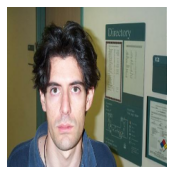

In [175]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(10):
  for i in range(1):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    #plt.title(class_names[labels[i]])
    plt.axis("off")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


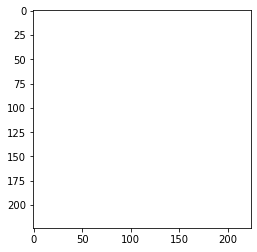

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 224, 224, 3) 19.142223 255.0
[ 47.95495   50.959137  55.95792   58.323288  60.26195   61.248253
  65.383865  66.120094  69.305626  69.35855   69.51206   70.0323
  70.795074  71.00198   71.09888   71.3811    71.93728   72.455124
  72.52146   74.23668   74.79503   75.817764  76.874176  78.925224
  79.953926  80.68903   85.316635  85.948204  89.51029   90.64374
  91.730225  91.73642   91.88858   92.51592   92.75081   93.78168
  94.21228   94.336426  94.48394   94.62308   94.67053   94.70093
  94.73858   94.7691    94.9071    95.245224  95.50059   95.54699
  95.84071   95.877785  96.21753   96.29765   96.50982   96.61486
  96.61667   97.02054   97.35344   97.43907   97.52383   97.67783
  97.78682   97.797066  97.85821   97.95423   98.01556   98.04775
  98.16717   98.21864   98.24861   98.35684   98.36633   98.436165
  98.72587   98.84999   99.17807   99.25662   99.291016  99.47522
  99.51417   99.56041   99.63371   99.93324  100.22249  100.333046
 100.45082  100.58485  100.65626  100.7

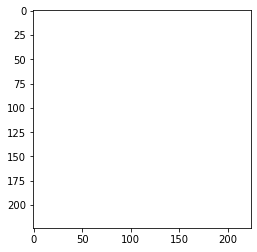

(1, 224, 224, 3) 11.535831 255.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 49.478004  49.86663   50.05543   50.6546    50.813797  54.63914
  54.986042  55.48441   55.86247   56.074802  57.314785  58.710102
  59.594925  60.07613   61.303562  61.316387  61.41405   64.426186
  67.10753   67.12184   67.27114   69.87196   70.99556   71.41544
  71.780235  73.74319   75.66069   79.0194    79.42073   81.63229
  85.788185  88.52051   89.01122   89.01455   90.39555   91.12359
  91.32461   91.661995  92.01881   92.17169   92.187126  92.34062
  92.87352   93.17595   93.26129   93.418365  93.42153   93.52187
  93.60859   93.890594  94.39359   94.57559   94.60646   94.94644
  95.11441   95.24735   95.25001   95.304146  95.448364  95.47352
  95.758446  95.785774  95.93501   95.94767   95.9824    96.01648
  96.07109   96.251434  96.30883   96.3488    96.38807   96.38915
  96.46027   96.682594  96.88681   96.99891   97.0468    97.12842
  97.15879   97.26205   97.56122   97.93988   97.94373   98.13335
  98.29738   98.36739   99.09959   99.21809   99.595345  99.69193
  99.716

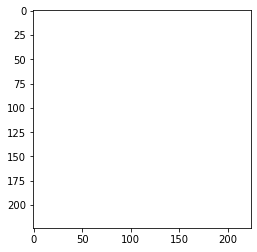

(1, 224, 224, 3) 25.725277 255.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 47.219845  48.346313  52.645393  54.197285  54.497562  55.63729
  56.11588   56.170452  58.040825  58.0537    59.68695   60.340603
  61.296867  61.934643  64.00007   64.23363   68.013275  68.17733
  71.248     73.24881   74.18326   76.67209   77.06122   77.21117
  77.99174   78.40257   80.92392   81.14468   82.112206  83.17946
  83.27626   83.54937   84.06164   84.20091   84.23913   84.2606
  85.19551   85.83159   85.849365  86.64076   87.07179   87.12859
  88.0092    88.10902   88.169716  88.27376   88.472244  88.68086
  88.75295   88.82298   89.04267   89.18463   89.51359   89.65072
  90.03343   90.09831   90.142006  90.650635  90.98542   91.341606
  91.80757   91.86452   91.89698   91.90747   92.00909   92.06151
  92.118286  92.19407   92.31902   92.44318   92.47219   92.72278
  92.96033   92.969604  93.00235   93.03168   93.036285  93.250374
  93.32525   93.36752   93.698204  93.70494   94.24428   94.36544
  94.70388   95.57572   95.66276   95.76322   95.94505   96.14099
  96.162

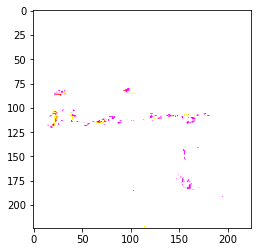

(1, 224, 224, 3) 0.0 255.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 66.62765   68.47095   70.76042   72.781784  73.51693   73.595924
  74.03153   74.79064   75.29032   77.35635   78.139     78.6959
  78.990265  79.029205  79.602486  82.27223   82.49412   83.55867
  84.65729   85.08277   85.94803   86.07796   86.2861    86.36974
  86.8413    87.22161   87.28675   87.40413   87.49718   87.77597
  87.87213   87.92009   87.97269   88.222084  88.597855  88.66794
  88.95487   89.256805  89.41821   89.73444   89.77272   89.84669
  89.86158   90.01871   90.10826   90.14218   90.1488    90.30073
  90.51721   90.5315    90.55666   90.60497   90.673546  90.695175
  90.756744  90.77868   90.99722   91.17846   91.209755  91.622635
  91.82634   91.89937   92.05564   92.29754   92.43572   92.60624
  92.776276  93.06262   93.06513   93.19462   93.36003   93.391106
  93.4224    93.449005  93.51914   93.70264   93.75587   93.85375
  94.08461   94.12412   94.182076  94.39619   94.408104  94.56173
  94.65288   94.97683   95.45268   95.68393   95.73669   95.75364
  96.13

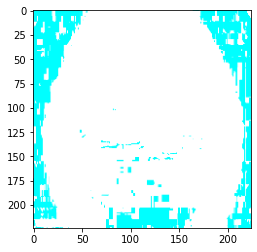

(1, 224, 224, 3) 0.0 255.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 60.04973   67.10806   67.21939   68.66711   71.28617   71.655304
  72.256325  78.53268   79.54766   80.665344  81.64196   81.894424
  82.347786  82.866615  83.60262   84.435425  85.23709   85.25391
  85.51347   88.510056  88.585594  89.36803   89.699104  90.17116
  90.32611   91.87833   91.935555  91.95072   92.29723   92.910934
  93.17617   93.29049   93.85628   94.23854   94.886215  94.983604
  95.0666    95.08934   95.41198   95.75325   95.77559   95.82901
  95.84191   95.864525  95.93624   96.10791   96.31696   96.470566
  96.64453   96.69106   96.86199   96.86359   96.87388   97.1132
  97.35532   97.40463   97.4619    97.52773   97.52943   97.54288
  97.6069    97.66216   97.68395   97.700745  97.738785  97.84105
  97.90452   98.426414  99.02266   99.08437   99.18661   99.23187
  99.353355  99.501236  99.52541   99.660095  99.66406   99.71716
  99.72321   99.864365  99.924515  99.975525 100.081184 100.18084
 100.46317  100.99433  101.17502  101.2169   101.34785  101.40503
 101.4

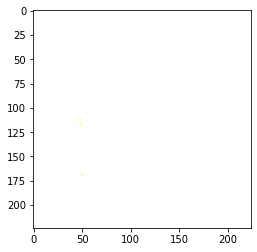

(1, 224, 224, 3) 0.0 254.32361


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 66.35099   66.916405  67.552216  68.41374   68.66339   69.09978
  70.01812   71.42705   71.648735  73.10306   73.76109   74.17319
  75.328995  75.75849   78.11451   78.25391   78.84795   79.78114
  79.85554   80.19414   80.828     80.97712   81.80959   82.24556
  82.49822   84.79459   85.16226   87.07851   92.824486  94.76717
  95.6496    97.70939   98.00686   98.71496   99.194145  99.51049
  99.83915  100.01147  100.05017  100.259964 100.515594 100.9693
 101.01682  101.243515 101.2527   102.078896 102.149765 102.18165
 102.39646  102.40421  102.65392  103.261604 103.26803  103.44711
 103.479126 103.49337  103.591835 103.65261  103.66854  103.82669
 103.84076  103.92422  104.0131   104.73458  104.73886  104.95337
 104.9632   105.44033  105.60621  105.694695 105.722    105.77209
 105.83112  105.907684 106.11059  106.171455 106.32466  107.08123
 107.2525   107.29267  107.55791  107.671005 107.78853  108.12368
 108.159386 108.16449  108.39129  108.65185  108.884674 108.9108
 109.10945  

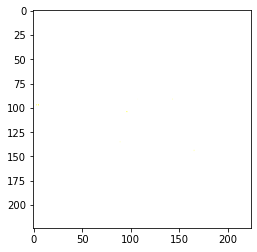

(1, 224, 224, 3) 0.08358504 241.7596


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 43.08466   43.596222  48.739407  48.99806   51.4951    54.104485
  54.144745  55.404633  56.963566  57.812447  57.933445  59.36192
  59.447105  60.115612  61.22375   61.29037   62.55208   69.74731
  70.384995  70.60407   70.97035   71.89084   72.0466    73.11632
  73.20169   74.06987   74.54259   75.659744  77.630486  83.06451
  83.37786   85.66076   88.20813   88.28589   89.05499   89.05504
  89.31305   89.623116  89.728935  90.9107    91.77528   92.167465
  93.177284  93.2323    93.36691   93.543655  93.63174   93.912766
  94.008575  94.34316   94.364716  94.39169   94.83485   94.9472
  95.26501   95.364395  95.40602   95.42193   95.45505   95.77815
  95.8051    95.852974  96.04768   96.2664    96.28806   96.35913
  96.63615   96.815735  97.711075  97.85103   98.22469   98.24791
  98.33418   98.4337    98.722496  99.013535  99.100914  99.11391
  99.24959   99.305275  99.311356  99.367424  99.48632   99.53766
  99.57878  100.12895  100.393166 100.47137  100.50917  100.57229
 100.805

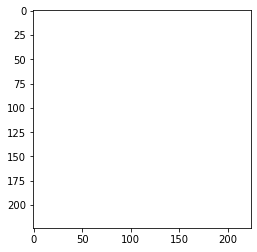

(1, 224, 224, 3) 14.779588 255.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 39.818897  53.60346   65.4915    66.623314  67.73545   68.13607
  68.75656   71.43801   71.48554   72.13989   72.17901   74.5234
  75.17433   75.44195   75.58641   77.36129   77.89252   78.75451
  78.87794   79.05545   79.13326   79.594124  79.77065   81.41346
  81.618324  81.9067    83.765     89.83108   90.80888   96.718765
  98.50481   99.16048  100.07752  100.40759  100.56996  100.590355
 101.101746 101.43868  101.83635  101.84839  101.9688   102.05107
 102.21871  102.23309  102.8471   102.93755  102.97565  102.98994
 103.012245 103.06684  103.118706 103.13434  103.344505 103.53535
 104.07809  104.120895 104.23532  104.39893  104.675385 104.9239
 104.96826  104.980286 105.008484 105.098625 105.14957  105.17195
 105.67915  105.90092  105.91616  105.98695  106.00137  106.268456
 106.3299   106.540115 106.55156  106.55779  106.57869  106.57967
 106.628426 106.746315 106.829506 106.92829  107.06849  107.12815
 107.323456 107.375694 107.429726 107.4771   108.089096 108.27435
 108.3867

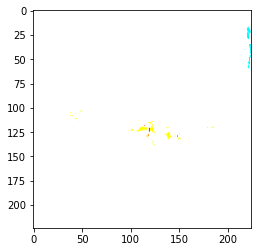

(1, 224, 224, 3) 0.0 255.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 53.862034  55.312374  69.2478    72.54813   75.23962   81.10901
  81.78931   81.959404  82.49477   82.65825   83.939964  84.24297
  85.056915  85.78928   86.3462    87.950714  90.13535   90.52833
  90.90555   91.527084  91.75013   92.66563   94.22563   94.469444
  94.597206  95.4239    97.787834 101.69673  109.24572  109.39081
 119.037384 120.58661  121.303856 122.92955  122.984634 123.018555
 123.042915 123.24612  123.40849  123.75671  124.11464  124.131004
 124.42065  124.68851  124.87745  124.916954 124.9749   125.04162
 125.09355  125.32693  125.51586  125.79175  125.82113  125.82847
 126.071075 126.16964  126.19683  126.58533  126.7985   126.91196
 126.953445 127.087296 127.13008  127.26836  127.28313  127.37162
 127.39941  127.44646  127.469986 127.526764 127.532555 127.590195
 127.61208  127.69935  127.723694 127.808975 128.01872  128.09781
 128.12555  128.19357  128.30995  128.46593  128.6231   128.82718
 128.84126  128.84961  128.90244  128.96371  129.15302  129.2061
 129.24

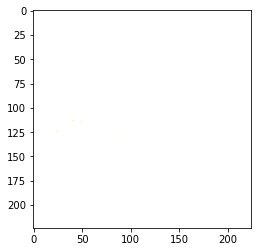

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 224, 224, 3) 0.045027673 255.0
[ 62.191418  64.031166  64.77219   66.51243   66.640366  66.66251
  69.66589   69.86804   73.17577   73.84254   74.735535  75.920876
  76.26681   77.28263   77.618706  77.693245  77.91192   78.03559
  78.673874  78.72769   78.76713   78.857086  78.95451   78.99872
  79.04359   79.2103    79.231155  79.401405  79.478035  79.61808
  79.71394   79.77218   80.02286   80.04771   80.66659   80.82888
  81.27355   81.3174    81.337036  81.46297   81.665     81.69412
  82.66372   82.68974   83.06959   83.10914   83.12044   83.131
  83.145424  83.18032   83.24288   83.32303   83.476166  83.47669
  83.68724   83.936005  84.03665   84.146805  84.393074  84.42728
  84.51815   84.63481   84.75217   84.76266   84.77994   84.8017
  84.81547   84.85502   84.979546  85.02949   85.03626   85.04908
  85.06444   85.07646   85.56475   85.60775   85.70515   85.80942
  85.9215    86.02464   86.12477   86.21841   86.22277   86.52765
  87.010056  87.090515  87.40163   87.90228

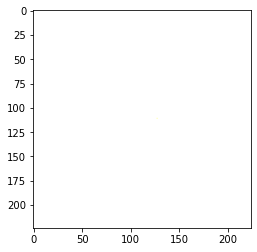

(1, 224, 224, 3) 0.66736364 255.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 67.390236  68.28055   80.87118   82.65662   83.996895  85.02128
  85.21062   85.93133   85.98061   86.832886  87.17953   87.51823
  87.76831   87.96649   88.232254  88.83288   89.036095  89.076904
  89.089264  89.19031   89.20984   89.432526  89.48694   89.60187
  89.699196  89.95635   90.27333   90.31977   90.41258   90.78262
  91.25678   91.290596  91.37045   91.50466   91.95357   92.32875
  92.51914   92.55926   92.58227   92.59589   92.68133   92.69944
  92.83995   92.953804  93.03311   93.063835  93.2776    93.45502
  93.492676  93.49414   93.499344  93.50333   93.58562   93.75089
  93.79516   94.17168   94.20926   94.26442   94.48502   94.48657
  94.703224  94.78452   94.94079   95.24787   95.421394  95.46314
  95.99194   96.3449    96.35541   96.36368   96.81867   96.84866
  96.951515  97.102715  97.14281   97.36571   97.449295  97.74732
  98.00914   98.16609   98.27504   98.29924   98.81092   99.04913
  99.09367   99.11932   99.27073   99.27667   99.35463   99.77308
  99.8713

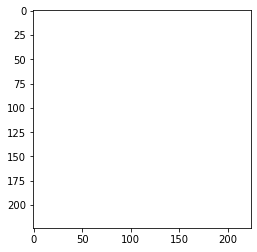

(1, 224, 224, 3) 5.669298 248.95203


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 47.904686  48.1861    49.7201    51.738007  52.12386   57.246346
  58.0764    58.57842   58.762226  60.200584  60.36255   60.78837
  60.992855  61.046467  61.336514  61.84025   63.81736   65.861275
  66.66372   69.76172   70.010925  72.04363   72.37562   74.28833
  74.76203   76.234474  76.28859   76.39808   77.52008   81.24215
  84.085335  85.437805  87.43498   87.906364  87.93433   88.40576
  88.4845    88.93973   90.07574   90.39512   90.62539   90.75607
  90.92125   91.083595  91.455154  91.51189   91.69303   91.70747
  91.957794  92.02074   92.08612   92.49937   92.72141   92.94923
  92.96795   93.10758   93.217674  93.29652   93.341095  93.44768
  93.58285   93.72244   93.80959   94.02549   94.35625   94.371796
  94.44375   94.51402   94.784294  94.86784   94.93906   94.97472
  95.149506  95.14984   95.30856   95.46601   95.587814  95.61388
  95.83709   95.91728   95.99882   96.812836  96.840485  97.060036
  97.23857   97.50285   97.66547   98.19985   98.26945   98.2912
  98.66

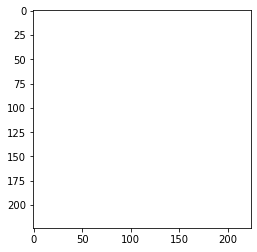

(1, 224, 224, 3) 1.7996693 255.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 51.12001   53.751602  56.586205  59.13878   61.322983  62.8521
  63.30697   64.60529   65.19138   65.71183   67.24303   68.88137
  69.20032   69.5158    69.84411   69.88707   71.883865  77.81753
  78.45672   78.73719   80.50068   81.320244  81.74382   82.00395
  82.97991   83.6134    86.996025  88.11329   88.14527   89.018295
  89.59091   90.85556   91.86097   91.92785   92.10165   92.45154
  92.930435  93.2932    93.603134  93.83744   94.515495  94.611084
  94.71709   95.01614   95.29117   96.056335  96.23766   96.27147
  97.74697   98.046936  98.18487   98.3016    98.55824   99.305084
  99.62732   99.737656 100.05496  100.2771   100.508705 100.60949
 100.90692  101.09766  101.24647  101.35729  101.83537  102.14799
 102.43391  102.462906 102.605835 102.63298  102.8338   102.965485
 103.65416  104.021805 104.14981  104.36743  104.51689  104.74216
 104.79064  104.91317  105.215096 105.27181  105.34999  105.44405
 105.453026 105.48261  105.83692  105.8621   105.87382  105.87952
 105.96

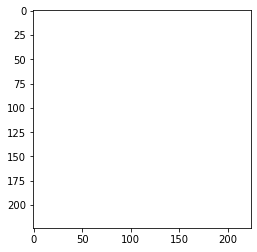

(1, 224, 224, 3) 22.14741 255.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 62.07364   62.252956  66.204926  66.21627   66.70155   68.722626
  69.024895  71.597534  73.67315   74.33127   75.09101   76.03158
  76.24456   76.61949   77.34051   78.16487   78.85969   78.89709
  78.9227    79.168915  79.46566   79.94562   80.809395  81.10695
  81.49023   81.65318   81.79503   82.032295  82.37159   82.37944
  82.74561   82.830826  83.00927   83.423164  83.45004   83.56024
  83.61503   84.00175   84.24429   84.330956  84.41337   84.473175
  84.604774  84.621635  84.72159   85.14185   85.21067   85.285416
  85.69852   85.71573   85.76802   85.914085  85.99132   86.10306
  86.12802   86.25379   86.40684   86.42831   86.434204  86.853775
  86.89075   86.92215   87.384186  87.45719   87.532715  87.544426
  87.54889   87.94943   88.060875  88.07245   88.14989   88.299515
  88.512634  88.51782   88.51957   88.58467   88.70407   88.72747
  88.8138    89.094345  89.28411   89.32247   89.385254  89.44071
  89.49961   89.60521   89.865456  89.91873   90.09944   90.39469
  90

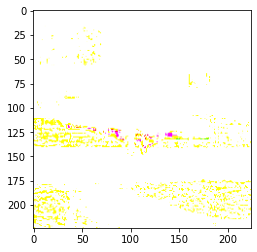

(1, 224, 224, 3) 0.0 255.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 60.174206  66.18836   69.080986  70.699005  71.251854  71.96598
  72.30442   72.91658   74.27598   76.08379   77.1873    77.54906
  78.826515  79.412704  80.324425  80.33429   81.16969   81.621025
  81.93972   82.17144   85.56029   86.64968   87.24503   87.525246
  87.62994   87.82673   87.849785  92.15419   92.32708   92.47639
  93.23516   93.76609   94.09525   94.70425   95.12162   95.1519
  95.470665  95.75039   96.04442   96.23878   96.52138   97.30867
  97.440865  97.62442   97.6738    97.6918    97.80344   97.88252
  98.32878   98.626335  98.78838   99.00902   99.78556   99.81786
  99.838936  99.92646   99.940865 100.02637  100.1631   100.19197
 100.22166  100.42805  100.55006  100.69437  101.144325 101.59805
 102.03179  102.22723  102.35504  102.37586  102.44167  102.444084
 103.063    103.24005  103.29173  103.42418  103.75934  103.82086
 104.01373  104.05195  104.123474 104.21453  104.64443  104.6822
 105.04416  105.24503  105.62299  105.73792  105.76515  105.81925
 106.0062

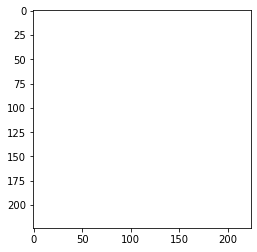

(1, 224, 224, 3) 10.741558 255.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 41.69316   48.13454   49.29477   58.62641   63.73983   66.181046
  67.203316  67.72928   69.843124  70.908356  73.654305  73.735565
  73.79961   75.088745  76.06538   77.115654  77.35533   78.55495
  78.782425  79.722786  80.69764   80.946754  83.61376   83.73105
  84.05292   84.59902   87.32374   90.75549   93.21935   96.91263
 105.85487  107.71265  108.15716  108.89174  108.91507  109.31292
 109.60119  109.61598  110.03067  110.05671  110.06502  110.3044
 110.46455  110.50229  110.54313  110.72603  110.83117  111.05213
 111.50916  111.724556 111.78313  111.83579  111.90847  112.21747
 112.37639  112.47393  112.54225  112.79814  112.80721  112.85183
 113.39289  113.44216  113.49294  113.57684  113.59283  113.60936
 113.69736  113.83191  113.89653  113.92036  113.922455 113.93256
 114.05411  114.12882  114.252556 114.274216 114.38083  114.443184
 114.56152  114.65266  114.78006  114.83043  114.91874  114.98043
 115.01738  115.11212  115.333694 115.40865  115.53927  115.74856
 115.930

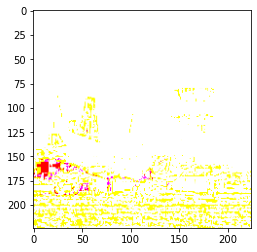

(1, 224, 224, 3) 0.0 255.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 59.877598  62.616463  66.17952   69.78475   70.1776    70.36323
  70.65926   71.22688   71.32852   71.65189   71.91731   72.340256
  72.408104  73.24543   75.04506   75.79565   77.03003   77.04044
  79.6126    79.71037   80.342705  80.41719   81.12423   82.46076
  83.4925    84.57181   85.459435  85.873314  86.53747   87.403206
  87.82244   87.91972   88.57157   89.117004  89.21306   89.234695
  89.38689   89.41699   89.45797   89.97479   89.98064   89.99681
  90.01707   90.070496  90.326035  90.84453   90.907074  91.29438
  91.54213   91.594185  91.74332   91.86352   91.98601   92.244514
  92.330894  92.46046   92.61313   92.62348   92.71696   92.73886
  92.772606  92.86318   92.92364   92.932526  92.9461    93.0596
  93.18905   93.273735  93.351715  93.55147   93.737595  93.743614
  93.74907   93.84544   93.968864  94.039604  94.072044  94.104485
  94.15956   94.37928   94.507576  94.521065  94.55169   94.634315
  94.64592   94.664116  94.71052   94.77598   95.05556   95.44349
  95

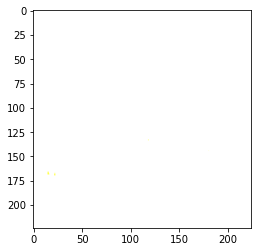

(1, 224, 224, 3) 0.0 255.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 46.560932  50.02602   50.98748   52.86335   53.06922   54.689705
  56.88769   57.27448   63.326748  64.218895  64.912895  66.747055
  67.89313   68.58114   68.58413   68.61049   69.99654   71.32434
  73.89235   74.76892   76.22928   77.77337   81.36475   82.15857
  83.24232   83.87867   84.09614   86.36633   86.9127    87.28756
  95.25427   96.49937   98.550385  98.93197   99.073524  99.6146
  99.89326  100.08838  100.64615  101.03597  101.15688  101.829895
 101.88436  102.272125 102.77617  102.7917   102.89086  103.03556
 103.406975 103.62     104.29178  104.553215 104.637054 104.78183
 105.322754 105.43235  105.85511  106.22795  106.53591  106.68188
 107.07872  107.09011  107.42602  107.57087  107.74716  107.74947
 107.762985 107.986084 108.08772  108.11548  108.323586 108.643776
 109.14415  109.70805  109.89358  109.95785  110.28678  110.41039
 110.43132  110.69954  110.76343  111.01076  111.020706 111.031715
 111.14623  111.1563   111.511795 111.596695 111.82257  111.91207
 111.9

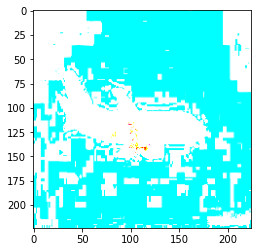

(1, 224, 224, 3) 0.0 255.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 51.51183   56.722496  59.26417   76.273636  78.39417   78.99808
  80.13998   80.80228   80.98416   83.94981   84.0805    85.54109
  85.900635  88.1473    88.62288   89.11426   91.89173   92.02548
  92.279755  93.56153   93.64571   94.0275    95.33232   96.90245
  97.1406    97.42045  100.04758  103.20351  109.90617  111.08577
 123.023994 124.53704  126.28155  126.92177  127.40637  127.623795
 127.77135  127.94868  128.19382  128.275    128.28531  128.40884
 128.49278  128.49673  128.58186  128.71626  129.15826  129.44716
 129.55418  129.56076  129.57529  129.73605  129.9838   130.12599
 130.26094  130.4187   130.67856  130.7219   130.93544  131.02818
 131.06133  131.08917  131.11739  131.14922  131.16728  131.1697
 131.20674  131.30646  131.47559  131.4829   131.54572  131.6995
 131.75809  131.77197  131.77364  131.81728  131.88402  132.18161
 132.24147  132.25345  132.25563  132.26308  132.43803  132.4544
 132.47124  132.56685  132.75244  133.09274  133.23062  133.67256
 133.69118  

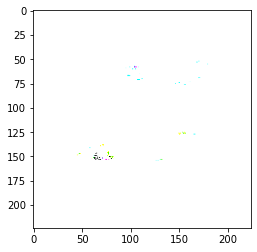

(1, 224, 224, 3) 0.0 255.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 97.85237   98.345634  99.58795  100.759636 103.071945 103.38205
 103.450516 105.57417  105.70899  105.98379  106.64069  106.78124
 107.035355 107.064896 107.56355  107.82223  108.063675 108.665146
 108.89885  109.04462  109.262665 109.388    109.40957  109.49297
 109.58703  109.59478  109.64942  109.68498  109.705414 109.76487
 109.95693  110.036545 110.23395  110.64059  110.667    110.6781
 110.71871  110.820305 110.8709   111.16297  111.21751  111.232864
 111.46246  111.47568  111.589264 111.63982  111.820366 111.85797
 112.04708  112.30019  112.32192  112.45739  112.643776 112.6572
 112.694786 112.726814 112.85167  112.94108  112.961876 113.09575
 113.2641   113.28411  113.29164  113.3394   113.37781  113.387085
 113.500565 113.50183  113.5044   113.56582  113.73761  113.74768
 114.037155 114.09308  114.40257  114.41216  114.46798  114.53802
 114.71226  114.83621  115.0983   115.32604  115.33541  115.79827
 115.88074  115.88151  115.92507  116.10095  116.13847  116.2919
 116.30167

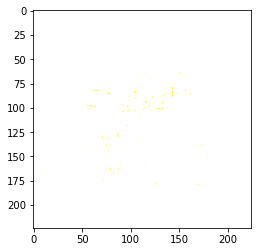

(1, 224, 224, 3) 0.0 254.92287


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 56.84236   58.194492  58.84285   60.288647  60.526352  62.1624
  62.639874  62.871025  63.666878  66.51227   66.5436    67.64753
  67.994865  68.44699   68.49347   68.54341   71.07391   72.38167
  72.93741   72.960464  73.00557   73.360115  73.376564  73.47763
  73.54192   73.74494   74.248184  74.58623   74.819466  75.0465
  75.39275   75.57343   75.60659   75.84501   76.18602   76.245834
  76.87721   76.993034  77.0066    77.02      77.04805   77.095345
  77.163605  77.28462   77.42644   77.530975  77.59807   77.62513
  77.93958   78.17874   78.1954    78.198616  78.6142    79.05066
  79.185974  79.43158   79.4512    79.4654    79.78377   79.799736
  79.8112    80.02711   80.08167   80.09136   80.09365   80.47905
  80.562416  80.620186  80.64536   80.68482   80.73797   80.9163
  81.70073   81.78817   81.98504   82.15368   82.23766   82.73744
  82.87526   83.51224   83.83157   84.11283   84.55781   84.94734
  85.06041   85.15766   85.23172   85.2645    85.82454   86.019646
  89.4246

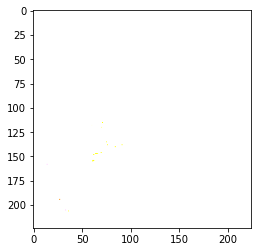

(1, 224, 224, 3) 0.0 254.81668


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 48.88023   52.139366  53.18279   54.391197  54.59119   55.359604
  56.647087  56.98809   57.9341    59.919277  61.13018   62.578785
  62.83415   63.553947  63.857582  64.48418   64.54162   65.09651
  65.52873   66.862274  67.782036  68.41306   70.35075   70.71115
  70.87621   72.54155   72.72946   73.58598   73.660034  76.20367
  78.09936   78.75306   79.21465   79.36435   79.68789   79.7635
  80.28341   80.43603   80.80214   81.26015   81.36131   81.503876
  81.712494  81.97976   82.34039   82.362976  82.63508   82.88931
  83.188896  83.21804   83.36466   83.38059   83.51588   83.60024
  83.766975  83.803246  83.855515  84.10078   84.32614   84.32763
  84.36174   84.396     84.72584   84.81881   85.141335  85.2395
  85.276855  85.39876   85.43257   85.93978   86.16433   86.19263
  86.205475  86.220314  86.49045   86.735916  87.32913   87.39133
  87.41174   87.8542    88.039825  88.13638   88.22867   89.54218
  89.68992   90.03348   90.0433    90.672775  91.516815  93.337036
  93.490

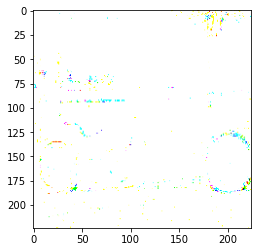

(1, 224, 224, 3) 0.0 255.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 58.292236  62.520657  63.697998  66.95903   67.07547   67.41177
  67.75378   69.17799   69.97517   71.10174   71.61678   73.477806
  74.46863   75.39797   75.49473   75.59044   75.77394   76.40701
  76.48357   76.97121   77.20268   77.64421   78.03056   78.44673
  78.670715  79.414375  79.64276   80.19471   80.47422   80.626755
  80.918495  81.089676  81.46561   81.63889   81.866165  82.09318
  82.22106   82.34315   82.38642   82.41233   82.55897   82.588326
  82.65122   82.98414   82.99238   83.114     83.22312   83.53972
  83.971     84.207924  84.21185   84.23724   84.468956  84.55931
  84.77229   84.80423   84.92524   85.078186  85.111084  85.22591
  85.29155   85.49638   85.528175  85.69878   85.70705   85.74524
  86.061295  86.06268   86.11403   86.14373   86.148926  86.22159
  86.63083   86.83565   87.303     87.34732   87.766365  88.13015
  88.132965  88.21994   88.32002   88.469666  89.23807   89.389336
  89.49105   89.663345  89.7222    91.616295  91.70566   92.70131
  93.5

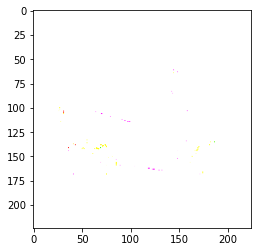

(1, 224, 224, 3) 0.0 255.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 59.794655  63.48558   64.00148   64.57006   64.82625   66.82428
  67.80295   72.18939   73.71912   74.56982   75.013916  76.151306
  76.76192   78.31223   78.67047   79.37497   79.441696  80.2014
  80.56565   81.179985  81.25451   82.49596   82.58848   82.690475
  84.24871   85.8877    86.21586   87.22034   88.56885   91.26364
  99.79086  100.032394 101.20489  101.27664  101.32108  101.430725
 101.71405  102.0993   102.259476 102.32915  102.34033  102.63551
 102.6996   102.935844 103.55785  103.71256  103.76258  104.02825
 104.123024 104.12898  104.15943  104.367546 104.5533   104.57549
 105.04821  105.34911  105.58064  105.673355 105.87921  106.082535
 106.290115 106.36569  106.47219  106.65797  106.76918  107.06527
 107.23985  107.645325 107.70326  107.72266  107.83753  107.853226
 107.87534  108.13413  108.19384  108.57013  108.735886 108.98527
 109.11244  109.28315  109.87739  110.90702  110.91268  111.02018
 111.031105 111.54702  111.91864  112.04355  112.19832  112.32565
 112.5

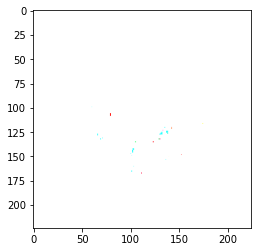

(1, 224, 224, 3) 0.0 255.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 52.795544  53.91583   54.310104  54.54714   54.739784  57.338688
  58.560535  59.756256  60.424713  61.54699   61.56593   62.325733
  62.58559   63.049286  63.122147  63.205738  63.648365  64.989845
  65.425705  66.50105   66.59394   66.79874   67.21259   69.22761
  71.16196   72.321144  72.664     74.447815  75.265884  76.95967
  85.69916   86.795525  87.06462   87.27923   87.62734   87.85802
  87.86278   87.918724  87.96643   88.3221    88.36378   88.581535
  88.770744  88.825714  89.28823   89.31768   89.39204   89.58161
  89.98686   90.058044  90.216484  90.24252   90.5183    90.553665
  90.97209   91.140305  91.16027   91.42528   91.44409   91.91762
  92.063774  92.29248   92.31274   92.40923   92.68795   92.791115
  92.81478   92.88592   93.03326   93.27529   93.29466   93.33322
  93.3594    93.44931   93.50826   94.29229   94.33341   94.422165
  94.45451   94.60098   94.65199   94.6743    95.09035   95.62002
  96.275345  96.77129   97.507774  97.687195  97.95735   98.28681
  9

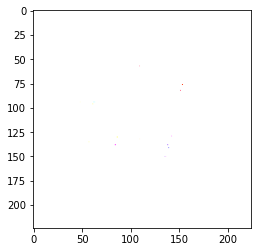

(1, 224, 224, 3) 0.071742415 255.0
[ 56.087975  58.694454  59.98234   60.122013  62.34985   62.744728
  63.31147   64.0168    65.02404   65.92866   66.54115   66.90251
  66.92433   68.72144   69.24717   69.283005  70.19967   70.25561
  70.40072   70.68214   71.238846  71.92462   71.93027   73.756676
  74.309     75.06015   76.68323   77.7619    77.90054   77.91569
  78.18353   78.53892   78.620224  79.16171   79.761314  80.11935
  80.23853   80.25291   80.956474  81.66854   81.69331   81.72813
  81.812874  81.83488   81.98595   82.40559   82.518295  82.53606
  83.137695  83.45135   83.486565  83.59143   83.87618   83.99131
  84.01563   84.17053   84.20243   84.34746   84.40372   84.52555
  84.80111   84.98782   85.300766  85.51098   85.523544  85.60296
  85.89211   86.13634   86.297905  86.34456   86.580734  86.669785
  86.70988   86.718025  86.85614   87.046036  87.32296   87.4739
  87.72821   87.997246  88.79488   89.47736   89.51803   89.97764
  90.539925  91.60335   91.77833   92.4

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


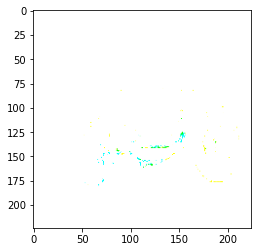

(1, 224, 224, 3) 0.0 255.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 59.74057   62.470634  63.50533   65.41189   66.38542   66.93696
  67.10263   68.087204  68.09042   68.51243   69.276505  69.4091
  71.16665   71.90106   73.05054   75.22713   75.38202   76.022095
  76.46267   76.7092    76.85851   78.20295   78.306725  79.44185
  79.47499   80.51921   80.64474   81.54295   84.30619   85.7678
  85.821846  85.98529   86.67941   86.71251   86.81765   87.06457
  87.21754   87.358406  87.55623   87.560585  87.757126  88.24715
  88.26237   88.49383   88.560684  88.63408   88.77096   88.77669
  88.80842   88.977745  89.20339   89.35362   89.35881   89.3756
  89.43431   89.92017   89.9868    90.12854   90.26892   90.427315
  90.45315   90.61639   90.64521   90.707146  90.93357   90.979965
  91.19973   91.23402   91.33742   91.52736   91.93656   92.37855
  92.4609    92.58023   92.666084  93.10891   93.2375    93.323204
  93.40344   93.756454  93.947296  94.04361   94.776306  94.91436
  95.10991   95.28732   95.39991   96.31715   96.373116  96.88952
  98.9060

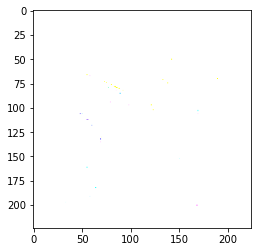

(1, 224, 224, 3) 0.0 255.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 42.66923   57.154243  58.3852    58.437775  58.63572   59.81121
  63.080196  63.095406  63.89381   64.42756   64.72349   64.73742
  65.17185   65.409676  66.14275   66.38251   66.67738   66.70221
  67.06412   70.09812   70.37726   71.78594   73.45279   75.09731
  75.1547    75.89846   76.39174   77.89102   78.015785  79.488464
  86.65327   86.70057   86.887314  87.03569   87.43922   87.85651
  87.93692   88.23599   88.34337   88.7514    88.87655   89.07408
  89.28949   89.39686   89.43022   90.02254   90.03831   90.04052
  90.11804   90.305214  90.3693    90.43575   90.793396  90.83694
  90.86019   91.24824   91.424255  91.51922   91.55245   91.67335
  91.68043   91.68613   91.84083   92.05882   92.18056   92.193855
  92.305244  92.60416   93.00171   93.01534   93.0238    93.18463
  93.28674   93.355316  93.364105  94.042336  94.10286   94.67675
  94.87238   94.88316   94.89708   95.302605  95.40066   95.531525
  96.12316   97.260086  97.573166  97.61128   97.621     99.31018
 101.17

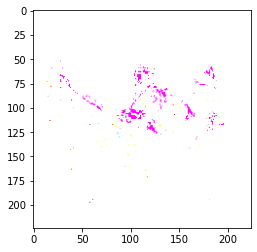

(1, 224, 224, 3) 0.0 255.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 54.502884  56.38945   57.51827   60.316685  60.455105  65.34737
  66.306755  66.55185   67.73738   67.923134  68.87208   69.21176
  70.29422   70.70105   71.321686  71.46949   71.61574   71.74666
  72.41392   73.287865  73.35522   74.20101   74.619995  74.821976
  74.96847   76.7944    77.34437   77.81587   81.02797   82.6193
  92.24664   92.97425   93.18627   93.25815   93.648796  93.72776
  93.855865  93.90929   94.12724   94.188545  94.36975   94.68525
  94.70861   94.79774   94.81907   95.07052   95.26583   95.6262
  96.090744  96.27732   96.36645   96.4722    96.47973   96.52825
  96.84545   96.936485  97.2063    97.31855   97.49982   97.641075
  97.69398   97.78104   97.92893   98.22709   98.26816   98.27972
  98.43919   98.56845   98.63292   98.64747   98.76031   98.83609
  98.90423   98.93136   99.48524   99.67646  100.05465  100.24557
 100.24767  100.24837  100.56506  100.5695   100.69221  100.712204
 101.11089  102.5007   102.50585  102.52968  102.683105 103.0664
 104.96944

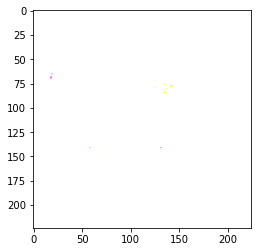

(1, 224, 224, 3) 0.0 254.88058
[ 57.278687  58.56716   60.64711   60.83576   61.913734  62.38849
  62.91184   63.054234  63.078857  63.84927   64.53478   64.68137
  64.8134    65.09894   65.330925  66.237     66.30019   66.51316
  67.592926  67.94024   67.96336   68.48078   72.06351   73.10508
  75.50148   76.91543   76.99957   78.02561   79.36577   79.9839
  84.85819   85.196724  85.54271   85.64495   86.320114  86.41304
  87.2041    87.28192   87.56557   87.88526   87.914925  87.938194
  87.9532    87.97236   88.20928   88.26636   88.3413    88.87659
  88.90706   88.91992   89.23662   89.55007   89.613625  89.76374
  90.088554  90.16398   90.269684  90.30079   90.350845  90.35889
  90.88132   90.90965   91.17439   91.27436   91.29473   91.29863
  91.29943   91.56562   91.711754  91.77671   92.029816  92.22586
  92.25752   92.62257   92.83626   92.85287   92.94135   93.015
  93.60799   94.39376   94.399124  94.76682   94.80837   94.848625
  94.86808   95.22133   95.50907   95.7507    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


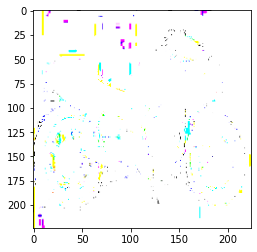

(1, 224, 224, 3) 0.0 255.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 54.491978  59.185818  61.317688  61.503014  61.589462  62.045933
  64.97071   65.0797    65.89017   66.405045  66.60586   67.06134
  68.59833   69.44183   69.6809    70.673035  70.802536  70.819
  71.21106   72.01443   72.150444  72.72331   72.74821   73.05169
  73.11298   73.29086   73.362434  74.028915  76.07425   78.012115
  82.69967   83.62389   84.046974  84.648445  84.6745    84.83533
  84.84964   85.07662   85.197586  85.3717    85.91773   86.042786
  86.24566   86.5009    86.77724   87.0055    87.385826  87.425125
  87.53522   87.66403   87.799446  87.89972   88.196396  88.41412
  88.563934  88.59745   88.61005   88.64006   88.74698   88.77677
  88.902306  88.97769   89.07687   89.07914   89.311134  89.4977
  90.25397   90.311584  90.373825  90.51852   90.59271   90.7099
  90.80092   91.09233   91.15464   91.23612   91.471924  91.76596
  91.85454   92.06386   92.19124   92.23464   92.89141   93.217384
  93.27159   93.88117   94.34924   94.614815  95.634285  95.890854
  98.432

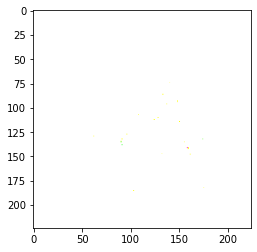

(1, 224, 224, 3) 0.0 255.0
[ 55.925465  57.356964  57.91491   59.027412  60.80124   60.975685
  63.69568   63.87148   64.96521   65.496956  67.21436   68.265175
  69.55116   71.11511   71.41943   71.4854    72.35215   72.52797
  73.21396   73.59228   75.65014   76.721405  77.01949   77.30494
  77.834274  78.20181   78.573296  80.07034   82.00937   82.65802
  82.95176   83.19917   83.65595   83.80926   84.42071   84.44331
  84.70481   84.951515  85.21364   85.37774   85.67045   85.89507
  86.34822   86.3556    86.360146  86.38666   86.46591   86.7327
  86.794266  86.87272   87.05735   87.24629   87.26794   87.53832
  87.55571   87.72241   87.72859   87.7402    87.760254  88.2992
  88.45239   88.83723   88.8534    88.98422   89.00106   89.088066
  89.096436  89.22853   89.58797   89.8283    89.93525   90.0074
  90.07995   90.70449   90.8373    90.9519    91.097176  91.121895
  91.25612   91.8329    92.0436    92.155846  92.27994   92.466995
  93.39382   93.611755  93.69216   93.81634   9

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


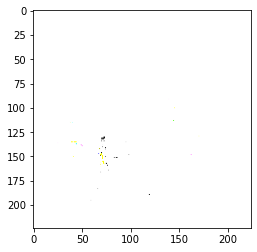

(1, 224, 224, 3) 0.0 255.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 47.839138  50.71901   51.280136  51.43387   52.336895  52.96684
  53.151237  55.39345   55.622494  55.73226   55.81768   56.15402
  56.276913  58.007706  60.42708   60.701645  61.00357   61.64129
  63.508987  63.833294  64.221245  65.11743   67.98637   68.597885
  68.64153   69.28213   70.13307   70.95532   71.376396  71.490204
  80.7499    81.33883   81.59735   81.64434   82.25924   82.67756
  82.69221   83.23363   83.28143   83.440956  83.51757   83.51971
  83.90194   84.255196  84.39958   84.5012    84.817184  84.95587
  85.08059   85.65585   85.806     85.85241   85.85517   85.91452
  86.07258   86.10233   86.16919   86.37055   86.40094   86.42844
  86.55058   86.85406   86.88839   86.997116  87.17156   87.1921
  87.24581   87.27732   87.706566  87.9351    88.24933   88.38116
  88.46939   88.873116  88.903336  89.236786  89.50518   89.68187
  89.79153   90.19239   90.49262   90.538605  90.65677   90.986206
  92.04222   92.822586  92.86579   92.88846   93.81288   94.88823
  96.629

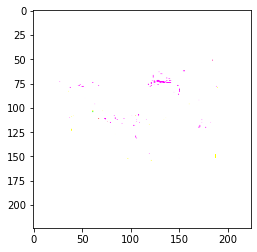

(1, 224, 224, 3) 0.0 255.0
[ 56.78788   57.516064  61.09216   62.92718   64.92584   64.999886
  66.581696  68.61745   70.07303   70.54349   70.61096   71.07723
  71.69974   71.91561   72.43105   72.47317   72.62548   73.035576
  73.7702    74.28937   74.57862   75.74139   78.28436   78.751755
  80.8471    82.185394  82.80536   83.14255   83.266075  85.26257
  97.064575  97.1423    97.16096   97.42348   97.62114   97.72696
  97.964966  98.12134   98.33656   98.439156  98.518814  98.85057
  98.908905  99.012344  99.218475  99.5003    99.58088   99.61627
  99.76332   99.7856   100.14371  100.14767  100.33879  100.70017
 101.09875  101.10614  101.12366  101.22907  101.52488  101.58717
 101.673134 101.75559  101.87901  102.00663  102.11887  102.306175
 102.32452  102.578606 102.77543  102.841255 103.05044  103.09764
 103.20306  103.404785 103.555016 103.61874  103.62089  103.93599
 103.99185  104.00284  104.13385  104.46856  104.75839  105.121284
 105.26352  106.18964  107.301285 107.434074

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 [1, 1, 1, 1, 1]
1 1 True


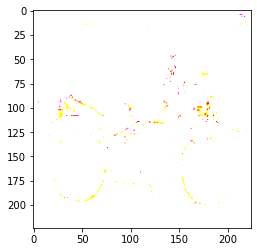

(1, 224, 224, 3) 0.0 255.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 56.52048   58.66407   59.1483    59.920273  60.856056  61.057655
  61.94431   62.34057   63.880486  63.9604    64.53986   64.61277
  64.9287    65.34659   66.76875   67.194214  67.299416  68.284584
  68.41195   68.460304  68.79754   68.880775  68.89435   69.479515
  70.63106   70.91498   71.59459   71.65265   72.43177   75.18765
  83.919395  84.78208   85.22761   85.24382   85.353905  85.40596
  85.5703    85.63383   85.65524   85.82228   85.89331   86.12878
  86.15117   86.297714  86.39238   86.42076   86.90677   87.25386
  87.74716   87.79302   87.94221   88.09753   88.47781   88.53781
  88.54441   88.8751    88.91949   88.93909   88.95702   89.10811
  89.11541   89.12623   89.248886  89.53878   89.792336  89.92624
  90.19108   90.22846   90.24479   90.35772   90.65954   90.748985
  90.751045  90.99073   91.24637   91.456116  91.76609   92.02291
  92.52178   92.669464  92.90004   93.52767   93.69976   93.857635
  93.88555   94.49343   94.81591   95.787285  95.83702   96.37577
  96.

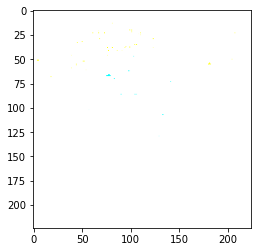

(1, 224, 224, 3) 0.0 254.74146
[ 50.281944  51.923992  52.6742    54.119663  54.393204  54.966213
  56.609398  57.88281   58.814022  58.891308  58.92001   58.97429
  60.022476  60.02877   61.064564  62.12135   62.415657  62.51564
  62.60104   63.14775   63.182102  64.11633   64.629456  64.86053
  65.02743   65.181435  65.21785   65.45143   65.93662   66.02541
  66.048134  66.077576  66.5923    66.83283   67.59765   68.42869
  68.96285   69.20246   69.382324  69.67907   69.78226   70.410324
  71.23714   71.26862   71.49849   71.620415  71.7959    72.29147
  72.33104   72.35499   73.09982   73.28153   73.37037   73.488846
  73.59726   73.74772   73.810715  73.952034  73.989365  74.047226
  74.35903   74.43092   74.464424  75.21216   75.44548   75.54732
  75.72035   76.390816  76.39786   76.56084   76.78377   76.91032
  77.205025  77.569466  77.94686   78.00739   78.34808   78.725044
  78.8885    79.06041   80.053764  80.09922   80.6484    80.84734
  81.41178   82.01141   82.20585   82.41

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


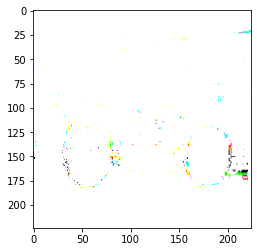

(1, 224, 224, 3) 0.0 255.0
[ 52.090897  55.352646  56.017     57.15854   57.217503  57.33058
  59.543774  60.536434  61.97611   62.294178  62.305283  62.699146
  62.734295  63.145287  63.44135   63.929035  64.28736   65.83374
  66.64791   67.075264  67.68824   67.95635   69.172134  70.435425
  70.61984   70.798965  71.11967   71.19827   71.32634   71.60493
  71.88824   72.7451    72.814026  73.19139   73.24483   73.57899
  73.61567   73.89093   73.940445  74.082184  74.39752   74.59677
  74.88298   75.08401   75.11719   75.48701   75.7417    75.74322
  76.02695   76.0735    76.7983    76.89941   76.932785  76.96131
  77.11246   77.21635   77.31995   77.34927   77.808266  78.06721
  78.13937   78.250435  78.60377   78.6225    78.65442   78.81212
  79.261696  79.26267   79.3725    79.41895   79.45134   79.51854
  79.90241   79.938614  80.219826  80.56979   80.68791   80.756165
  81.13046   81.38172   82.1834    83.23487   83.39015   83.78365
  84.25637   84.312126  84.45252   85.88876   

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


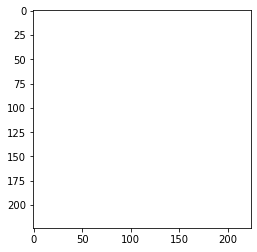

(1, 224, 224, 3) 1.8353615 255.0
[ 61.28671   61.32773   62.724815  65.47672   66.08944   66.49514
  66.59233   68.04413   68.6166    69.37077   70.44781   73.18448
  73.231     73.421974  74.31354   75.12855   76.38125   77.92741
  78.27408   78.55284   78.58644   79.80893   79.93409   80.07479
  80.28752   83.16013   84.24373   89.200195  90.1264    90.997116
  91.56556   93.03429   93.167625  93.45375   93.50314   93.69356
  94.10214   94.22909   94.24886   94.271225  94.564316  94.65789
  94.75418   95.01376   95.02833   95.09878   95.33173   95.39423
  95.45582   95.73355   95.769     95.941605  96.20758   96.37858
  96.54581   96.87744   96.9389    97.1431    97.32241   97.32341
  97.46895   97.49087   97.627754  97.71018   97.791504  97.838455
  97.97975   98.05982   98.31349   98.43433   98.903656  98.95523
  98.99452   99.42652   99.459045  99.59443   99.603836  99.84533
 100.38861  100.469215 100.8901   101.00321  101.99417  102.34815
 102.49352  102.70917  102.77936  103.321

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


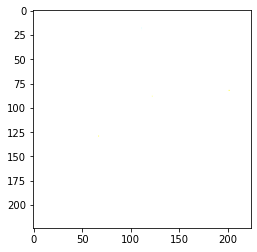

(1, 224, 224, 3) 0.10474825 255.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 54.47641   55.487885  55.77917   57.57352   59.383892  60.009796
  60.206413  62.20025   62.6525    63.615257  63.72693   64.4656
  64.63513   65.72316   66.533066  67.478264  67.8925    68.30539
  68.7551    69.70967   70.22814   70.363945  71.13173   71.22462
  71.364044  72.87548   76.57058   78.48094   78.72398   82.58914
  82.98191   83.88124   84.11091   84.14535   84.48922   85.16828
  85.73283   85.76425   86.02546   86.19641   86.692024  86.729454
  86.76355   86.881966  86.963554  87.2744    87.397194  87.88544
  88.02509   88.74219   88.942024  89.26493   89.29914   89.38385
  89.51449   89.64786   89.735756  89.796326  89.796875  90.107925
  90.137634  90.25298   90.43895   90.49654   90.7195    90.78611
  90.942764  91.13984   91.169975  91.17113   91.343956  91.401146
  91.45364   91.503296  91.59698   91.9125    92.17204   92.31791
  93.03545   93.28999   93.67955   93.86716   94.07178   94.91674
  95.83774   95.90701   95.95516   96.54644   96.90501   97.23091
  97.86

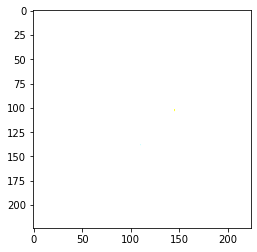

(1, 224, 224, 3) 0.0 254.90958


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 44.451958  49.408096  49.667534  51.22634   51.67673   52.02927
  53.96765   55.159256  55.375706  56.31495   57.183666  57.71837
  59.187687  59.862198  59.874084  60.122284  60.773327  61.56251
  61.64487   61.79813   61.979546  62.798767  63.31637   63.45099
  64.27277   64.64969   65.866035  70.023575  70.04629   72.639496
  72.91688   73.15343   74.003525  74.26148   74.5189    74.6337
  74.69607   74.92383   74.9299    75.54505   75.56844   75.70854
  75.8087    75.8574    76.81689   77.183205  77.333336  77.39835
  77.554276  77.88318   77.99007   77.99156   78.13065   78.25557
  78.44732   78.63354   78.66378   78.70256   78.9806    79.29286
  79.464745  79.558205  79.964355  80.14563   80.17496   80.21278
  80.2297    80.24142   80.266426  80.28827   80.30376   80.423325
  80.6234    81.323395  81.434685  81.7739    81.86271   82.02134
  82.12124   82.502075  83.504196  83.88227   84.46324   85.849655
  85.930214  86.356155  86.421524  86.70238   87.049675  87.44938
  89.769

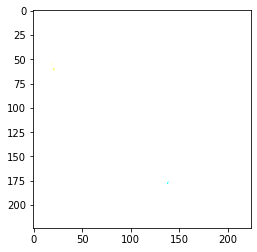

(1, 224, 224, 3) 0.0 255.0
[ 43.13766   46.93716   52.659542  53.099995  56.625786  56.871407
  57.49649   59.198772  59.414772  59.757706  60.05072   60.6424
  61.2536    61.65773   62.603676  63.092644  63.129177  64.34652
  64.67848   65.21657   65.83582   66.05495   67.22922   67.83499
  69.26745   69.69331   72.14351   73.09781   73.19472   73.73824
  73.953926  74.28012   74.28462   74.45985   74.484     74.937035
  74.94108   75.514534  75.57843   75.61055   76.70985   76.710754
  77.15008   77.25698   77.394875  78.00358   78.00788   78.20816
  78.30686   78.30809   78.44126   78.46886   78.68048   78.79276
  78.97098   79.63944   79.801414  79.84242   79.920135  80.57696
  80.7575    80.84429   81.08188   81.17432   81.33802   81.966606
  82.09296   82.50805   82.60463   82.9885    84.28067   84.352974
  85.14867   85.22474   85.792465  86.132256  87.05561   87.12253
  87.8112    88.039314  88.14085   89.31988   89.332436  89.390434
  89.74315   89.77336   89.88948   91.193695

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


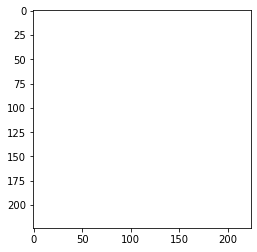

(1, 224, 224, 3) 2.758888 255.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 39.701     42.37876   44.091427  45.28096   45.89446   46.108
  46.1207    47.541183  47.6956    48.959362  49.55686   50.67898
  53.052845  53.102444  53.175137  53.18908   55.11177   55.67985
  55.860455  58.431538  58.53904   58.563965  59.944317  60.28809
  61.62155   62.61302   65.10828   65.56168   70.306145  71.150276
  71.8362    72.51817   73.88426   74.51712   74.58717   75.151245
  75.514175  75.706184  75.927246  76.17651   76.63354   77.91754
  78.04876   78.10463   78.10635   78.18576   78.27964   78.56979
  78.67178   78.752205  78.87396   79.02714   79.07387   79.10993
  79.13218   79.40881   79.48794   79.64553   79.68651   80.26781
  80.32406   80.499344  80.62231   80.63501   81.09158   81.6006
  81.98848   82.01854   82.20023   82.711784  82.72765   83.76922
  84.38834   84.621025  84.89217   85.478516  85.80046   86.10289
  86.34982   86.58459   86.83693   87.04307   87.144135  87.835014
  88.327385  88.332275  88.542885  88.62991   89.104     90.25243
  90.53669

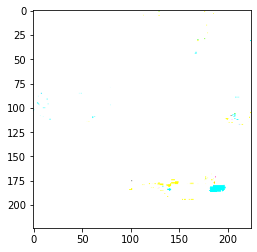

(1, 224, 224, 3) 0.0 255.0
[ 45.215096  45.64478   45.967796  46.99169   51.063156  52.573063
  52.80243   52.98692   53.067707  53.939873  54.41424   54.439766
  55.245674  55.563156  56.0225    56.253258  56.783287  57.251564
  57.634518  57.67339   57.697887  58.102047  58.21397   58.32985
  60.899525  64.172615  64.65987   66.22274   67.66336   68.687294
  69.60428   70.21782   70.36317   70.67001   72.42194   72.47241
  72.58045   72.97329   73.32148   73.4976    74.13444   74.593445
  74.65529   74.97078   75.37481   75.484     75.624016  75.713295
  76.01859   76.27711   76.64263   76.83919   77.05717   77.06023
  77.18033   77.32077   77.34392   77.956764  78.65063   78.68127
  78.971405  79.116005  79.25502   79.462654  79.46639   79.59177
  79.85326   80.09008   80.75969   81.99785   82.23036   82.30952
  82.687     83.06659   83.56631   83.633606  83.72116   84.03082
  84.21375   84.74824   85.38465   85.71851   85.73768   86.667046
  86.810005  86.95602   87.02605   87.3297

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


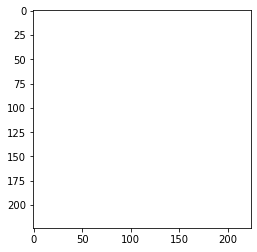

(1, 224, 224, 3) 2.6804056 255.0
[ 44.03379   44.3455    46.30025   47.12649   47.35869   47.988792
  49.26142   49.517326  49.549313  50.589394  50.72609   51.047016
  51.048206  51.425274  51.493343  52.956062  53.328888  53.428417
  54.41988   54.82186   58.979374  60.39835   61.467857  64.81665
  64.96631   65.47293   67.72515   68.280266  74.00883   76.35113
  77.644     77.76272   78.3785    79.17998   79.376144  79.402565
  79.799995  79.92526   80.5388    81.189735  81.281044  81.29375
  81.49091   81.75432   81.8423    82.027435  82.41231   82.45924
  82.63611   82.844604  83.42177   83.64375   83.68208   83.92032
  84.38019   84.46778   84.62382   84.8201    84.85283   84.85582
  85.002594  85.05148   85.43257   86.25273   86.51267   86.69434
  86.80159   86.83255   87.08671   87.19917   87.496086  87.75293
  88.10902   88.47153   89.17223   89.23026   89.513     89.61501
  89.998886  90.062454  90.33897   90.55466   90.57075   90.86214
  91.21701   91.426     91.796776  91.9

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


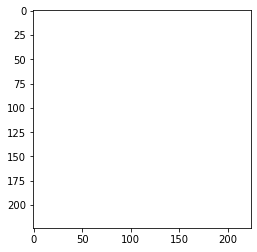

(1, 224, 224, 3) 6.0554185 255.0
[ 20.00498   53.422546  54.01864   54.36337   55.08786   55.216545
  56.16264   56.16435   56.21606   56.430847  56.446632  57.354
  58.370327  59.090862  59.33624   60.46662   61.758087  62.539658
  62.76549   65.88168   67.43595   70.07127   70.20293   72.398926
  72.7997    72.91441   73.85683   73.92626   74.162476  76.21463
  78.755226  79.6854    80.67095   80.99387   81.60768   82.38487
  82.85003   83.30918   83.52437   83.63105   83.69032   83.823044
  83.93863   83.93869   84.23739   84.41212   84.55647   84.74101
  85.04669   85.44923   85.75894   86.2445    86.25111   86.26396
  86.39364   86.62436   87.229095  87.24689   87.57088   87.60121
  87.63095   87.643814  87.745544  88.043686  88.19435   88.21112
  88.36387   88.650375  88.77054   88.96599   89.34779   89.77691
  90.00326   90.072845  90.22606   90.25773   90.4829    90.52978
  90.764305  90.85518   90.89466   90.92168   90.9525    91.0995
  91.47782   92.19676   92.72478   93.2661

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


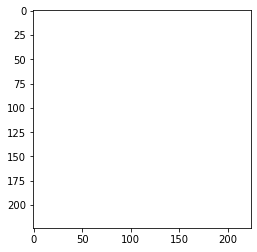

(1, 224, 224, 3) 1.6891751 255.0
[ 46.52531   51.326828  51.803425  52.07343   52.898235  52.97675
  54.674362  55.008324  55.40984   55.720276  55.79686   55.953873
  56.056484  56.286003  56.735126  56.898552  57.004044  57.602238
  57.7636    57.97466   58.689346  59.373676  60.469208  60.60293
  61.283688  63.491634  66.806854  68.86595   69.27882   70.24532
  70.299835  72.31068   72.38126   72.59789   72.80995   73.92195
  74.215546  74.25569   74.28465   74.75629   74.92688   75.10681
  75.29573   75.337364  75.62754   77.12766   77.24627   77.31061
  77.36183   77.84173   77.90751   77.96218   78.14171   78.26522
  78.58462   78.696945  79.112404  79.385216  79.46608   79.56982
  79.79815   79.829765  79.94277   80.342094  80.538536  80.92469
  81.49476   81.67149   81.755356  81.9008    82.22965   82.3449
  83.009735  83.23811   83.781555  83.78351   84.16822   84.504074
  84.759186  84.98881   85.21668   85.26596   85.56556   85.58465
  85.702194  85.92924   86.020615  86.282

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


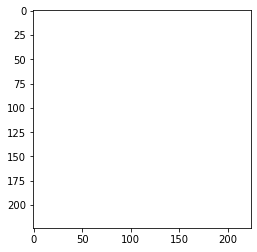

(1, 224, 224, 3) 2.0019908 255.0
[ 15.892104  38.479176  41.604095  43.264324  43.61698   43.82989
  44.0761    45.833954  46.079662  46.48463   47.20523   47.97493
  48.68136   48.69941   48.91919   49.656807  49.77456   52.199245
  54.81816   56.780106  57.051064  57.99311   58.314236  60.365044
  61.32439   62.855812  65.108894  67.24393   71.1593    73.30673
  73.460304  75.44541   75.45209   76.02717   76.57552   76.61172
  77.06412   77.33308   77.653336  77.7607    78.136444  78.19278
  78.21602   79.334915  79.430725  79.68594   79.7301    79.73743
  79.98258   80.153656  80.213646  80.65294   81.151985  81.179855
  81.251945  81.25906   81.38053   81.43118   81.47062   81.805374
  82.07345   82.44502   82.46133   82.7247    82.825775  83.08487
  84.13576   84.28797   84.48248   84.61067   85.19568   85.33243
  85.386284  85.46585   85.54304   85.66976   85.77261   85.85607
  87.2386    87.923355  88.03671   88.03705   88.15207   88.24512
  88.265465  88.79741   88.92633   89.1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


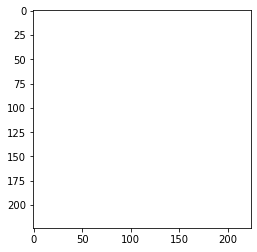

(1, 224, 224, 3) 1.1608887 255.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 42.773857  45.491367  45.582455  45.964146  47.87097   48.0583
  48.096897  49.591423  50.086376  51.00328   51.03058   52.57225
  53.321148  54.40698   54.8185    55.475803  56.332943  57.469936
  58.36558   59.864708  60.994186  63.020763  65.22648   68.797806
  69.043205  69.47819   71.29971   72.65877   78.37147   81.50128
  81.883705  81.9386    83.10035   83.53525   83.86426   84.13632
  84.476585  84.58727   85.3009    85.303535  85.34844   85.42958
  85.514046  86.49858   86.80764   86.9757    87.12949   87.20222
  87.41768   87.49971   87.62      87.85854   87.90041   87.9039
  87.90775   88.0451    88.234695  88.59384   88.7549    88.89124
  89.02988   89.518875  89.92171   90.05388   90.05534   90.62494
  91.0148    91.11317   91.18052   91.43857   91.504654  91.79556
  92.38793   92.87078   92.92577   92.96695   93.899124  94.13843
  94.17473   94.43337   94.462364  95.02845   95.05364   95.12909
  95.580284  96.04948   96.08298   97.220566  97.4565    97.5274
  97.671715

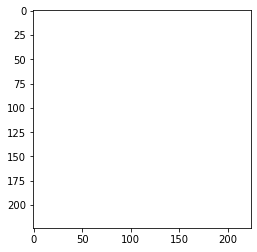

(1, 224, 224, 3) 3.5972672 255.0
[ 30.226374  31.1781    34.83583   34.926044  37.937744  38.653652
  38.89146   38.914913  41.485107  43.896023  44.80557   45.606552
  46.431274  47.728497  48.19688   48.317604  49.881996  50.71224
  51.543186  51.996273  52.06262   53.588     57.066486  57.73213
  58.69599   60.00508   61.90387   64.66402   67.42813   72.008446
  72.26504   72.354836  73.429214  74.06701   74.087204  74.23976
  75.32896   75.669815  75.77438   75.9084    76.35142   76.7116
  76.90334   77.1416    77.812355  77.92574   78.19049   78.530655
  78.79454   79.03414   79.234055  79.23899   79.33012   79.34652
  79.38314   79.41601   79.55646   79.63979   79.65185   79.89195
  79.95313   80.07065   80.45596   80.95331   81.93056   82.61953
  82.826645  83.05108   83.4874    83.564735  83.66115   83.80931
  84.13      84.35102   85.08014   85.47145   85.693535  86.02037
  86.49622   86.62289   86.97568   87.02828   87.17675   87.324486
  87.57478   87.81456   88.34394   88.5

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


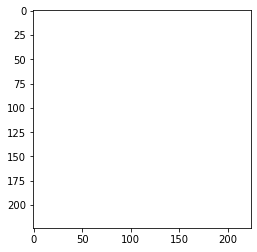

(1, 224, 224, 3) 1.1496487 255.0
[ 42.811436  46.557957  48.335155  48.445553  51.39426   55.18658
  55.860558  55.984177  57.15851   57.849815  59.15828   59.727776
  62.61335   63.48593   63.738804  64.17302   64.63691   64.76536
  64.97392   65.22485   65.25282   65.27409   65.55325   65.61247
  65.81891   66.249664  71.41125   72.348404  72.85325   72.8577
  73.50911   73.775986  74.27893   74.35695   74.35742   74.43855
  74.590225  74.7405    75.09305   75.56303   75.78261   75.83191
  76.29069   77.195404  77.278366  77.71816   77.97819   78.00996
  78.17412   78.639626  78.65459   78.67411   78.77168   78.95696
  79.18828   79.52366   79.53542   79.79999   80.0073    80.392494
  80.40987   80.42796   81.35202   81.7744    82.15206   82.40478
  82.57889   83.10845   83.45923   83.70117   84.26758   84.8109
  85.39397   85.72253   85.78762   85.82381   86.508125  87.17259
  87.22417   87.593956  88.27264   88.3231    89.3584    89.41435
  89.53825   89.788864  89.889496  90.0778 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


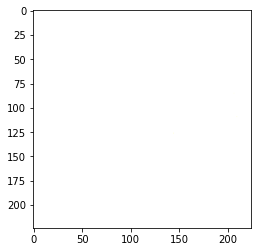

(1, 224, 224, 3) 0.8790035 255.0
[ 48.97563   49.136375  49.192287  54.92569   54.959805  56.52693
  59.87765   60.166466  60.56      61.51116   61.751026  62.014515
  62.137337  62.59018   62.688866  63.018402  63.522205  63.647972
  63.923042  64.04155   65.0944    65.94156   66.29404   66.944954
  67.05001   68.42067   72.40878   72.92065   74.46393   74.90976
  76.13141   78.68117   78.786415  79.08068   79.47612   79.53354
  80.646385  80.823616  81.10941   81.13533   81.4518    81.75498
  81.97447   82.50996   82.57687   83.25425   83.447914  83.45098
  83.51352   83.84415   84.368324  84.3933    84.68682   85.0365
  85.07584   85.20422   85.57804   85.73865   85.781456  86.08011
  86.146675  86.6251    86.67177   86.851295  87.03753   87.098404
  87.915054  87.94675   88.02463   88.195015  88.38808   88.81202
  89.27545   89.62787   89.869514  90.208885  90.63556   91.02724
  91.075485  91.89054   92.508934  92.93919   93.16587   93.70498
  94.141     94.66259   95.326614  95.67

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


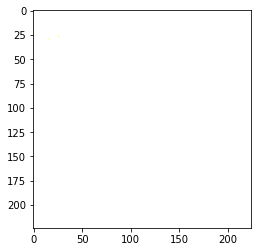

(1, 224, 224, 3) 0.0 254.57715


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 35.08296   40.22593   40.55517   40.92057   41.905136  42.16834
  42.58665   43.43659   43.61618   43.680573  44.76265   46.09421
  47.20669   47.283882  48.85173   49.647644  50.98894   51.015118
  54.247196  55.36832   55.57854   56.21568   57.463905  58.654835
  60.9541    61.885838  62.67299   64.1697    70.14764   71.033104
  72.2084    72.34704   73.30679   73.875374  74.028984  74.8398
  75.14642   75.288414  75.37339   75.49646   75.74854   75.766754
  76.483444  78.29075   78.68206   78.71253   78.82091   78.84282
  78.85238   78.88556   78.956635  79.02833   79.1415    79.419266
  79.453545  79.8179    79.84346   79.94925   80.07159   80.14296
  80.26402   80.2745    80.36366   81.30665   81.34074   81.51463
  81.83673   82.31872   82.56476   82.608055  83.17636   83.31779
  83.5516    83.69721   84.02948   84.72135   85.29994   85.41502
  85.51119   85.684586  85.875626  86.373665  86.541855  86.85333
  86.935394  87.10567   87.20333   87.335785  88.5342    88.7718
  89.08

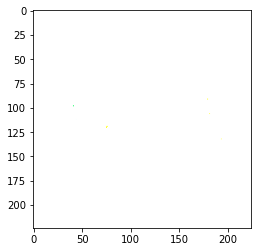

(1, 224, 224, 3) 0.0 255.0
[ 49.68341   54.624016  54.761097  55.721973  56.02334   56.045204
  56.163864  56.273403  57.549618  57.794353  57.905224  58.221603
  58.478527  58.828987  59.202305  59.243156  60.706787  60.983307
  61.098934  61.357754  61.66774   62.51228   62.630054  62.74181
  63.54591   64.87363   65.97019   68.34783   68.47693   69.20994
  77.49973   77.77577   78.64238   79.79409   80.2034    80.52048
  80.88609   80.888695  81.20873   81.25446   81.52673   81.67385
  82.13116   83.04256   83.145195  83.81043   83.82658   84.017105
  84.49351   84.53027   84.68646   84.74117   84.746796  85.00782
  85.03526   85.05224   85.07575   85.48502   85.53283   85.98783
  86.22922   86.56291   87.20333   87.25513   87.67893   87.82397
  87.88555   87.889885  88.21054   88.31735   88.457085  88.58507
  88.66016   89.13678   90.40377   90.45898   91.158875  91.197205
  91.32038   91.34456   91.90166   91.961716  92.56025   92.64721
  92.896324  92.92094   94.17743   94.76862 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


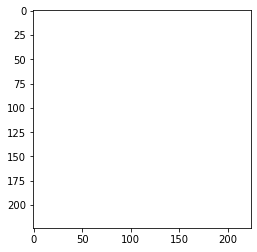

(1, 224, 224, 3) 8.33828 255.0
[ 47.063305  49.267063  53.06535   54.01209   55.49549   55.903347
  56.130054  56.39376   57.03413   57.085495  57.50166   58.270817
  58.498486  58.680923  59.58734   59.74496   59.839195  60.409924
  60.574493  61.08262   61.24941   61.342552  61.798584  62.167187
  62.441364  65.44555   68.24058   68.3637    69.00548   70.535126
  71.15831   71.62956   74.15501   74.38589   75.50204   76.18751
  77.55285   77.735756  78.09005   78.12234   78.376495  78.53926
  79.24798   79.367355  79.43306   79.43597   79.51883   79.69545
  79.8906    80.14251   80.48222   80.558495  80.80806   80.85792
  81.009094  81.087685  81.36363   81.37956   82.24802   82.45716
  82.5134    82.9334    83.03315   83.17524   83.21312   83.28659
  83.66548   83.88415   84.338264  84.848     84.94055   86.12181
  86.35683   86.78268   86.916405  87.64846   88.02268   88.05124
  88.22546   88.380005  88.61164   88.79761   88.93588   89.18669
  89.81565   91.867455  92.270065  92.36

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


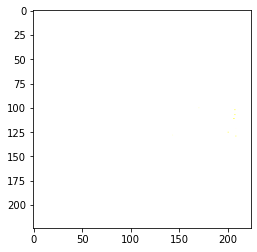

(1, 224, 224, 3) 0.0 255.0
[ 39.298103  44.202072  44.43905   44.88525   50.387802  53.624992
  53.688305  54.19579   55.23371   55.2744    56.46445   56.53857
  56.71159   57.31689   57.366825  58.493053  58.538467  58.595963
  58.815086  59.53219   59.682575  59.83912   60.754253  61.536102
  62.981113  63.083214  67.872     67.907814  68.62938   68.8515
  69.089325  69.25625   70.26165   70.93407   71.66949   71.76359
  72.14032   72.59563   73.20868   73.25277   73.73406   73.797646
  73.877426  73.93749   74.66808   74.78389   74.84355   74.898254
  75.09056   75.10211   75.12941   75.20469   75.67745   75.78645
  76.231804  76.5039    76.74646   76.79393   77.14139   77.72242
  77.81774   77.93877   78.07009   78.31433   78.420044  78.95594
  79.14453   79.29704   79.815025  79.88759   80.45596   81.18697
  81.41537   81.8924    82.27517   82.48052   82.54543   83.029816
  83.29503   83.401535  83.42828   83.64096   84.249985  85.65465
  85.90097   87.15736   87.162025  87.207436

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


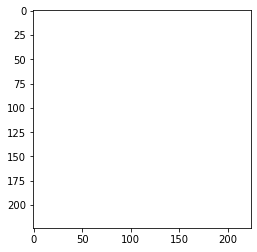

(1, 224, 224, 3) 2.5695572 255.0
[ 39.966763  42.935688  45.036583  46.41994   46.842922  48.593082
  48.781395  48.982918  49.299545  49.78835   50.160538  50.431698
  50.524796  51.927303  53.465385  54.420147  55.008377  55.27155
  55.65146   56.105545  60.057198  62.000076  63.526115  63.857723
  67.15439   67.67767   70.46543   71.701294  75.171486  75.83217
  76.44742   76.65613   77.39312   78.74166   80.502266  80.55543
  81.35795   81.42075   81.47816   81.60178   81.96776   82.14852
  82.267586  82.5508    82.898964  82.956764  83.030975  83.08133
  84.40274   84.45637   84.900925  84.988014  85.12051   85.236496
  85.26799   85.685165  85.81137   85.93882   86.06801   86.19802
  86.23079   86.358284  86.87998   86.90114   87.148415  87.64568
  87.7314    87.964264  88.018875  88.233635  88.58954   88.77844
  89.017876  89.26247   89.392586  89.55068   90.04392   90.06368
  90.443436  90.647514  90.6994    90.90556   91.21634   91.37555
  91.67149   91.834724  91.96123   92.0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


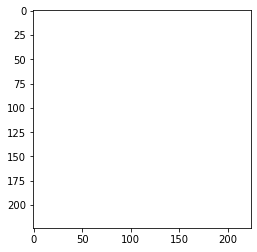

(1, 224, 224, 3) 3.94981 255.0
[ 44.217632  45.804276  45.816856  46.645306  47.834686  48.398975
  48.663273  48.781548  49.517826  50.036545  50.25009   51.26027
  52.10979   52.274307  52.33828   52.7828    53.478035  53.537693
  54.002335  54.194862  55.022404  55.165733  57.603035  59.102787
  59.422424  60.32783   60.900566  65.07505   67.61049   71.26293
  73.65638   74.27797   74.88339   75.39141   75.74043   75.83412
  76.18265   76.82245   76.924904  77.13287   77.817184  78.17269
  78.23359   78.47549   78.86734   79.16934   79.34812   79.82774
  80.00952   80.31466   80.335075  80.66552   81.00838   81.07777
  81.12533   81.25251   81.368835  81.71914   81.84989   81.88317
  81.91334   82.38453   82.679436  82.71472   82.90304   83.170074
  83.77722   84.05906   84.127464  84.23755   84.69089   85.333885
  85.85199   85.97623   86.12519   86.32269   86.8744    87.0755
  87.2544    87.265045  87.49455   87.820595  88.027824  88.39209
  88.6519    88.77868   89.02363   89.276

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


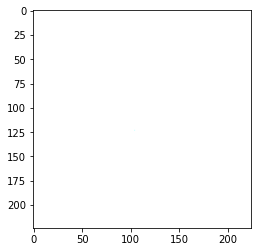

(1, 224, 224, 3) 0.7908292 255.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 45.59533   45.596653  46.63347   46.703987  47.253822  47.300217
  49.558186  51.939396  54.205364  54.37165   54.67116   55.989773
  56.836826  57.134476  58.110115  58.660625  59.950222  62.17217
  64.677986  65.14291   65.83786   68.945114  71.864174  73.08659
  73.29311   74.228516  74.80826   77.16851   78.39189   81.75268
  82.55485   83.406105  84.64547   84.91431   84.961975  85.27807
  85.84135   86.322845  86.35689   86.91634   87.16447   87.541794
  87.7165    87.94355   88.19879   88.28227   89.06316   89.33207
  89.415016  89.670296  89.67219   89.93326   90.338326  90.44386
  90.463425  90.47324   90.49824   90.66452   90.739044  90.741974
  90.74563   90.87399   91.036026  91.12656   91.4869    91.52798
  91.699425  92.48328   92.6808    92.73424   92.8686    93.46362
  93.53501   94.22422   94.470406  94.507416  94.6312    94.674576
  95.11259   95.2325    95.23862   95.36205   95.52651   95.88685
  96.36252   96.6724    97.01061   97.02515   97.179924  97.1848
  97.6

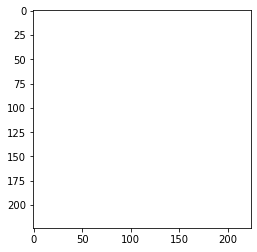

(1, 224, 224, 3) 2.3155365 255.0
[ 24.940237  28.220078  32.007263  48.901928  48.995102  49.703754
  49.920563  49.983746  50.124355  50.476612  52.6876    52.69994
  52.981346  53.082966  53.33878   53.47995   53.71579   54.158276
  54.928127  55.58387   56.32124   57.679287  58.269062  58.842632
  61.543045  62.768147  64.05514   64.54011   65.00868   66.438416
  68.976654  71.3177    71.37397   71.9763    72.19797   73.93149
  73.96513   74.56552   74.6702    74.72096   74.990814  75.00133
  75.26047   75.48151   76.93165   77.10871   77.256386  77.44567
  77.46627   77.51172   77.56318   77.677124  77.782295  78.00692
  78.20768   78.386375  78.495804  79.10444   79.16262   79.46956
  79.51698   79.769775  79.94788   80.01615   80.3695    80.5849
  81.564224  81.5763    81.81923   82.03138   82.223724  82.22561
  82.36725   83.67628   84.158035  84.84127   85.089005  85.104805
  85.178696  85.52922   85.68586   86.4593    86.686386  88.94995
  88.959114  89.162315  89.663445  90.1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


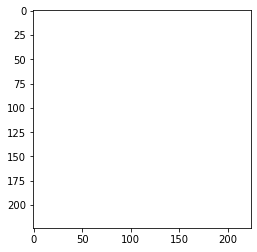

(1, 224, 224, 3) 6.4034157 255.0
[ 18.677525  26.801802  43.291473  45.261726  45.725536  46.297802
  48.00348   48.078403  48.288563  48.828514  49.06856   49.152412
  50.563416  51.035492  53.47833   53.657722  53.85439   54.553326
  54.92418   55.850037  56.070156  57.601048  60.737     61.60788
  63.196136  64.72806   66.43257   66.567924  71.76102   72.21101
  74.22117   75.24407   75.669464  76.83865   78.00211   78.037445
  78.15184   78.25774   78.366066  78.629425  79.38738   79.48916
  79.614975  80.657814  81.13951   81.151726  81.25996   81.714966
  81.72554   81.78325   81.92441   82.006     82.07003   82.156685
  82.170616  82.28268   82.46146   82.85119   82.93776   83.056076
  83.063354  83.07961   83.629166  83.85604   83.99053   84.7086
  84.91041   85.044075  85.310776  85.60142   85.66458   86.41074
  86.58825   86.66894   87.38815   88.32421   88.36593   88.97376
  89.23312   89.2971    89.31059   89.805374  90.197716  90.56868
  90.59056   91.17369   91.24123   91

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


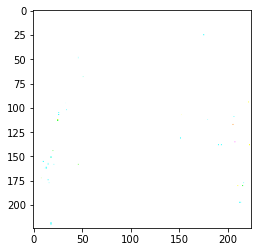

(1, 224, 224, 3) 0.0 255.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 49.185005  54.389828  57.69076   61.08915   64.4094    64.63966
  65.20373   65.39755   65.58371   65.59693   66.03023   66.199196
  67.14708   67.66474   67.792755  68.45742   69.69921   70.760826
  70.832405  72.18414   74.10142   74.3581    74.55228   74.62847
  74.62888   74.65334   74.89342   76.376686  76.490776  76.8647
  76.92626   77.30175   78.546486  79.164     79.670494  79.89045
  80.76404   80.80037   80.93097   80.99452   81.04111   81.08947
  81.329056  81.80657   81.89399   82.15831   82.21425   82.26013
  82.32736   83.02664   83.307434  83.52794   83.658325  83.762794
  83.86835   83.93556   84.04294   84.68463   84.72119   86.00381
  86.522125  86.84275   86.98591   87.299644  87.546646  88.28479
  88.394325  88.715996  88.8676    89.0983    90.28063   90.47985
  91.37238   91.78052   91.84196   92.65718   92.80786   93.44258
  94.03895   94.18844   94.560745  95.144875  95.38613   95.60729
  95.713936  96.80791   96.948814  98.70947   99.3373    99.381065
  99.58

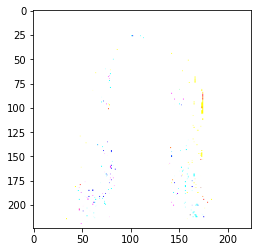

(1, 224, 224, 3) 0.0 254.23842


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 38.266937  46.012215  47.116646  50.071957  52.346397  52.53668
  52.644783  53.35501   54.011898  54.93618   56.32274   57.186962
  58.836147  58.89642   59.737095  61.142227  62.666206  63.02554
  63.11488   63.520054  64.84794   65.47639   65.71106   72.570885
  72.74195   73.867455  74.747345  75.551544  76.094734  76.16341
  76.82196   77.34958   77.569275  78.155365  78.911575  79.433495
  80.3963    80.94953   81.000305  81.03196   81.23326   81.25148
  81.3896    81.406654  81.44727   81.58696   82.189384  82.314514
  82.573685  82.85047   82.9241    83.30544   83.508934  83.59936
  83.86602   84.52155   84.63556   84.798134  85.08971   85.09312
  85.455864  85.51071   85.54752   85.60403   85.675385  86.299355
  86.46128   86.52958   87.52854   87.84588   87.9368    87.983025
  88.097626  88.929306  89.64759   90.04139   90.14041   91.57672
  92.17091   92.41641   92.647865  94.53188   95.06867   95.47618
  95.59198   95.6631    95.97163   97.29121   97.38112   98.258705
  9

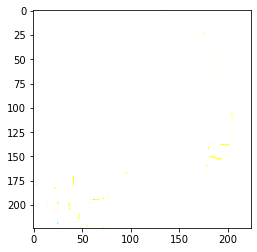

(1, 224, 224, 3) 0.0 255.0
[ 53.88548   54.51263   55.049355  57.607983  58.393463  58.823837
  59.887688  60.39696   60.61534   61.054073  61.066025  61.977913
  63.728523  64.194786  64.32043   65.58664   66.27961   67.18947
  67.6339    67.84917   67.88789   68.11137   68.837715  69.31316
  70.384705  72.80145   74.185295  75.28966   75.50857   75.52581
  75.65942   76.3576    77.726974  77.93888   79.05058   79.05998
  79.42057   79.60413   79.86179   80.369835  80.44678   80.591286
  80.77513   81.16094   81.42332   81.82816   81.84319   81.905426
  81.95708   82.12451   82.33992   82.44752   82.4943    82.54632
  82.80047   83.616516  84.18068   84.26993   84.44357   84.70601
  84.72604   84.79728   84.88599   85.20006   85.534355  85.61765
  86.154106  86.599464  87.18025   87.3048    87.33316   87.33676
  87.59989   88.327705  88.49169   89.82494   90.60868   90.842316
  91.11925   91.808495  92.3116    92.50694   92.826225  94.58259
  94.71399   95.13041   95.45011   96.02818 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


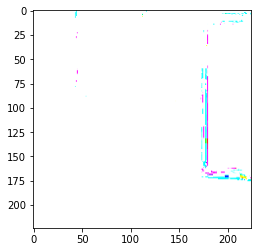

(1, 224, 224, 3) 0.0 255.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 47.719875  51.679527  51.859753  52.339848  52.385498  52.791653
  54.055508  55.63587   55.83382   57.76956   59.064903  60.26621
  60.93816   61.02571   62.690987  63.458286  63.771347  64.40382
  66.238434  66.255264  66.92229   68.14848   68.41002   71.194595
  71.854836  72.63492   74.4321    74.493355  75.59771   75.71524
  75.80168   75.90642   77.44677   78.217186  78.24156   78.264244
  78.26442   78.717995  78.96589   79.46768   79.47256   79.49739
  79.9541    80.62215   80.751305  80.90308   81.08585   81.10935
  81.13378   81.18584   81.35353   81.5981    81.62046   81.78524
  81.85769   82.08788   82.1504    82.502495  83.0089    83.13207
  83.16705   83.43964   83.478264  83.54575   84.933784  85.00077
  85.898094  86.4268    86.53873   86.63209   87.43919   87.76905
  87.83437   87.863815  88.83859   89.30876   90.776535  91.27278
  91.519646  91.72991   92.01077   94.919876  95.19508   95.20599
  95.30327   95.34439   96.20308   96.30652   96.71167   97.00297
  97.14

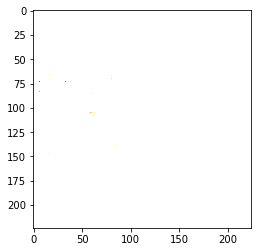

(1, 224, 224, 3) 0.0 255.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 49.13892   51.3723    52.246277  53.563652  53.995953  54.060772
  55.019474  55.450478  56.593616  56.730957  58.23122   58.73884
  59.079372  59.59989   59.88578   60.563595  60.959175  61.06309
  61.656895  62.399254  62.402836  62.53334   64.17374   64.82283
  64.95732   65.563644  68.0547    68.05471   69.29941   69.63749
  69.81188   71.59811   71.88345   72.2265    72.35818   72.5664
  73.21223   73.27614   73.31758   73.49103   73.62948   73.714
  73.77119   74.537285  74.74466   75.05833   75.43238   75.55217
  75.87548   76.035866  76.24843   76.27217   76.52033   76.757385
  76.87521   77.15175   77.43757   77.63265   77.912834  78.22229
  78.32847   78.6105    78.92364   79.39609   79.8475    80.19491
  80.24394   80.4765    81.33331   81.472885  81.4845    81.994415
  82.543365  82.8569    83.09398   83.55315   84.60979   84.79094
  86.31742   86.58653   87.429924  87.45186   88.07795   88.54484
  88.81732   89.15721   90.68151   90.75015   90.878426  91.58217
  91.82195

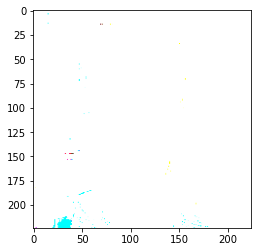

(1, 224, 224, 3) 0.0 254.93262


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 50.35142   54.96063   55.742874  59.315735  59.897118  60.273308
  60.41154   60.58988   60.673     62.46528   64.29838   64.36429
  64.47325   64.93141   65.29659   65.38298   65.63831   65.78446
  66.299     68.32199   69.36931   69.38918   69.54984   70.56648
  71.431816  73.08824   73.73597   73.925995  74.10064   75.17524
  75.71817   77.19415   77.2505    77.31818   77.89241   77.96851
  78.49471   78.722466  78.85289   79.00187   79.00223   79.054306
  79.28522   79.40306   79.497574  80.23988   80.30046   80.345436
  80.414925  80.632675  80.69486   80.73885   81.742035  81.745804
  81.873764  82.421295  82.53888   82.70958   82.90804   83.16588
  84.25514   84.432976  84.6943    84.85848   84.94257   85.518265
  85.63284   86.124954  86.69202   86.710335  87.428856  88.01919
  88.90324   88.93571   89.53442   90.24272   90.6791    91.53356
  92.53377   92.6945    94.081894  94.519936  94.91692   95.02606
  95.541306  95.84726   96.26699   96.80563   96.948105  97.02013
  97.

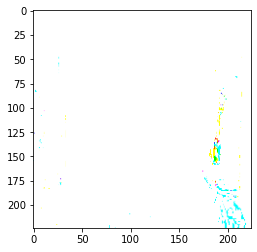

(1, 224, 224, 3) 0.0 254.77051


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 59.364037  60.351723  60.495544  62.528133  63.800674  64.37383
  64.77967   65.256615  65.40363   66.258514  66.30949   66.79041
  67.89867   68.81509   69.00574   70.70603   73.166664  73.6006
  73.67486   73.96534   74.04739   76.20853   76.84225   76.9945
  77.34333   78.01779   80.39994   80.6331    81.03838   81.97949
  82.98008   83.5523    83.72261   83.82317   84.36755   84.45569
  84.81391   85.08543   85.788     85.985954  86.05103   86.301605
  86.39818   86.54581   86.57351   86.59385   86.824554  86.85624
  87.42948   87.57852   87.64701   88.21856   88.308044  88.31653
  88.47885   88.90151   89.029755  89.4839    89.948616  90.48727
  90.53084   90.55576   90.58882   90.71516   91.20867   91.88529
  92.04829   92.65222   94.15559   94.38145   94.508224  95.27953
  95.68956   95.72783   95.84416   97.592285  99.07759   99.19709
  99.36722   99.46045   99.58727  100.35852  100.53284  102.01107
 102.77705  102.80113  102.8677   103.148384 103.15313  103.26789
 103.44575 

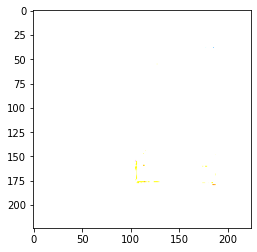

(1, 224, 224, 3) 0.0 255.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 41.79672   47.90713   49.409958  51.306923  51.928722  52.025585
  52.112648  53.06942   54.329117  54.37287   54.595745  56.58047
  57.01729   57.581486  58.23204   58.81571   59.029312  59.65061
  59.78436   62.001514  63.00446   69.800575  70.00777   70.13307
  71.12298   71.79318   72.440315  73.9467    79.69695   80.19216
  80.68728   81.45943   81.83221   81.899414  83.94052   83.97588
  84.25285   84.45605   84.46985   84.593124  84.68452   84.98907
  85.627716  85.716515  85.973915  86.0709    86.19624   86.57002
  86.64988   86.81999   86.8862    86.94094   86.99257   87.18256
  87.22582   87.2362    88.683876  88.68661   88.8242    88.852005
  88.98309   89.068924  89.105194  89.38282   89.46906   89.682304
  90.15783   91.12195   91.38177   91.966896  92.09427   92.277374
  92.68892   92.884224  93.06426   93.485756  93.79021   93.97358
  95.82011   96.09805   96.68401   96.71198   97.39512   97.68459
  98.709854  98.91478   99.412445  99.9164   100.12014  100.209694
 100.

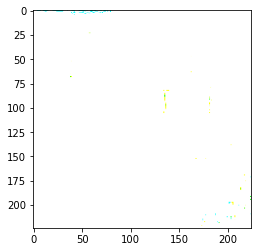

(1, 224, 224, 3) 0.0 255.0
[ 40.247536  51.556282  52.07437   53.098835  53.61586   54.6403
  54.857994  55.409832  55.60442   55.89287   56.14602   56.346012
  56.72066   57.259453  57.482536  57.7194    62.755108  63.906845
  64.35709   64.514496  64.66689   65.475235  65.50468   71.48298
  71.54029   71.845726  72.338425  73.50986   76.798294  77.93746
  78.61139   78.823746  79.91363   80.24256   80.3391    80.95607
  81.40989   81.428955  81.46498   81.51185   81.66948   81.88989
  82.786995  83.23427   83.3939    83.40612   83.44965   83.56623
  83.713974  83.85042   83.98339   84.368416  84.53693   84.57395
  85.134384  85.26005   85.34986   85.43183   85.520065  85.80392
  86.46739   86.48723   86.5839    87.05003   87.231255  87.4358
  87.76665   87.98345   88.08864   88.562874  88.802414  89.5444
  89.869316  90.08047   90.587326  90.75134   90.7699    91.70059
  91.83002   92.116905  92.52387   93.37985   93.52243   94.037476
  94.744415  95.50207   95.61924   96.382545  96.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


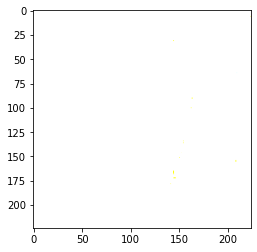

(1, 224, 224, 3) 0.0 255.0
[ 45.317142  48.129284  48.658237  51.504417  53.385124  53.81891
  55.053223  55.215942  56.04427   57.67136   57.768223  58.046803
  58.521374  58.926723  59.0449    59.087738  59.65936   60.28027
  61.020493  62.160973  62.701664  63.649815  65.36034   66.02879
  66.24989   67.244835  69.724396  69.745285  69.97421   70.42911
  71.95997   72.13998   73.585686  74.33573   75.038734  75.35492
  75.85505   76.04829   76.15607   76.264854  76.3302    76.594376
  76.888084  76.889404  77.385345  77.95482   78.197266  78.463356
  78.70662   78.73778   79.03584   79.054054  79.095566  79.2905
  79.38195   79.84565   79.93628   80.09961   80.125275  80.334366
  80.723755  80.99539   81.101715  81.993004  82.217545  82.304276
  82.97222   83.40143   83.60464   83.757645  84.595505  84.86185
  85.12423   85.42502   85.741684  86.30506   87.186775  87.57882
  88.20124   88.52964   89.300575  90.00498   92.73588   92.90185
  92.907845  93.10245   93.50769   93.57146  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


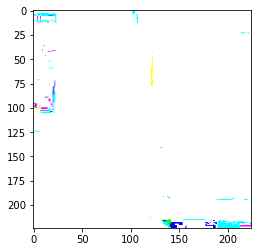

(1, 224, 224, 3) 0.0 255.0
[ 47.24733   48.83715   50.8564    52.57869   52.814953  54.163837
  55.04612   56.382217  56.42209   56.50696   56.598568  56.91603
  57.177208  57.33608   57.525665  58.350883  58.44198   58.82846
  59.166817  61.1153    61.748096  61.92215   64.23674   66.1898
  67.47021   68.75274   69.169586  69.60427   70.14267   70.18663
  70.33886   71.13535   71.418335  71.57793   71.63408   72.006996
  72.242905  72.548004  72.548775  73.15881   73.17118   73.17769
  73.88511   73.89078   74.44422   74.57473   74.70767   74.80542
  74.83955   74.9734    75.03413   75.14612   75.190315  75.227554
  75.828186  75.89894   76.160034  76.160706  76.28459   76.619446
  76.82688   77.00936   77.05496   78.200745  78.34241   78.83897
  79.240715  79.37108   80.05383   80.63063   80.74887   81.232796
  81.757515  82.19562   82.78766   83.36015   86.01384   86.08579
  86.10895   86.25893   86.643036  87.648994  89.28496   89.45368
  89.48474   90.241844  90.25504   91.027336 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


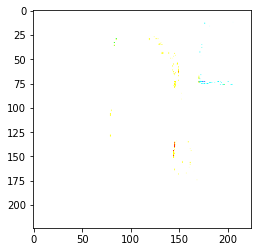

(1, 224, 224, 3) 0.0 254.72165
[ 37.776     38.09152   42.972458  44.009422  45.038647  45.3614
  46.904625  48.385838  50.92731   51.42812   51.474033  51.728798
  52.929424  52.994514  53.85694   53.98998   54.538403  55.59005
  56.600216  56.684307  57.03061   59.4307    59.75685   66.22775
  67.17901   67.890366  70.110054  70.41423   74.31054   75.36239
  75.44341   76.08719   76.28279   78.21389   78.21826   78.63737
  78.79012   79.23383   79.5127    79.90901   80.27457   80.333824
  80.48684   80.50856   80.679016  80.8677    81.07799   81.142845
  81.2954    81.61307   81.75178   81.813866  81.91838   82.21224
  82.44761   82.46389   82.86175   83.29712   83.298416  83.34063
  83.81893   83.972305  84.13812   84.484566  84.799164  84.96107
  85.39381   85.66602   85.69447   86.15829   87.29388   88.00438
  88.48312   88.4856    88.85623   89.49014   89.87823   90.55097
  90.587036  91.063736  91.37035   92.19387   93.74671   93.90897
  95.11817   95.22678   95.47278   95.69059

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


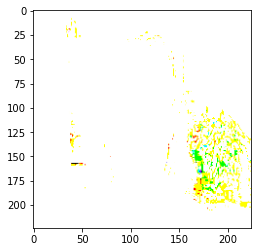

(1, 224, 224, 3) 0.0 255.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 39.4622    44.499214  47.368244  48.428608  49.45428   49.801205
  49.874165  49.88139   50.21324   52.153564  52.366188  52.802086
  53.679127  53.812107  54.244377  54.41561   55.050953  55.90772
  57.844864  58.138885  58.20865   58.973736  59.594948  59.988316
  62.465164  66.63269   68.2062    69.59303   70.444695  71.15611
  71.297325  71.82659   72.6375    72.961136  73.95214   73.97484
  74.7056    74.850296  74.916824  75.113014  75.59179   75.641045
  75.87665   76.06084   76.59596   76.64575   77.16669   77.45871
  77.6191    77.63708   77.95643   78.61121   78.6507    78.651764
  78.7116    78.73584   79.12356   79.13682   79.40993   79.76841
  79.76986   79.859184  79.88984   80.11698   80.48882   80.57298
  80.75183   80.9484    83.12274   83.83528   84.01595   84.10034
  84.27187   84.57392   84.904396  86.39223   87.159836  87.21803
  87.693504  88.17293   88.68224   89.65284   90.52892   91.35029
  91.523026  91.572105  91.65098   92.526306  92.847626  93.33686
  93.

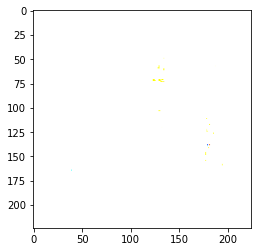

(1, 224, 224, 3) 0.0 255.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 50.491135  52.1614    53.19664   54.174774  54.69046   55.46806
  55.98974   56.23188   57.39485   57.522545  58.1497    59.076515
  60.537117  60.603855  60.855583  62.237656  63.108955  63.563263
  64.58307   64.58661   64.662636  65.76185   71.23165   73.434166
  73.94512   74.73381   76.23594   76.964966  78.76065   80.716286
  80.78723   81.47452   81.725235  82.69363   83.23232   83.51662
  83.82036   83.94474   84.29282   84.305466  84.35794   84.94628
  85.05544   85.343666  85.44205   85.79853   85.94589   86.24977
  86.584564  86.97821   86.98171   87.27512   87.278076  87.279755
  87.84736   87.92086   87.96807   88.094925  88.5494    88.65718
  88.80521   89.276436  89.44866   89.5295    89.607155  90.03136
  90.53077   91.81101   91.82139   92.378784  92.56229   92.83004
  92.8682    93.686966  94.35901   94.40859   95.444405  96.182106
  96.21379   97.104965  97.648926  98.834305  99.05932   99.1462
 100.2731   100.99287  101.00239  101.13796  101.200134 101.44107
 101.

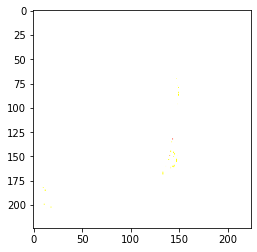

(1, 224, 224, 3) 0.0 254.30273


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 47.418827  47.493874  48.466217  49.208096  51.357365  51.66049
  52.213642  54.130226  55.17757   57.04117   57.61673   57.739395
  58.15873   58.565647  58.966743  59.300083  59.63521   60.85783
  61.271675  61.76416   63.17081   63.991096  64.09275   69.01628
  70.4947    71.7828    72.006805  73.256096  73.31587   73.84068
  75.6842    76.07842   76.15178   76.4976    76.77183   78.06176
  78.814224  78.96636   79.024925  79.27432   79.38471   79.55318
  79.601814  79.62561   79.78164   80.371     80.58263   81.068085
  81.10349   81.21594   81.31401   81.42599   81.58901   81.631195
  82.22036   82.38624   82.90509   83.110115  83.16209   83.61909
  83.747986  83.83786   84.26621   84.29422   84.465706  84.65235
  84.71823   84.99969   85.447784  85.54149   86.232414  86.283905
  86.51463   88.04607   88.33664   89.27732   89.655624  89.797485
  90.13938   90.288635  92.58666   93.48635   93.63359   94.01802
  94.0931    94.81379   95.43827   95.532455  95.699585  96.57163
  97.

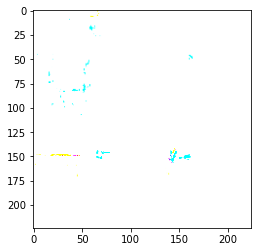

(1, 224, 224, 3) 0.0 255.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 42.93955   43.03186   45.033577  48.379307  48.489643  48.7116
  48.953297  49.051212  49.46571   50.409233  51.176697  52.77262
  52.850605  53.584606  53.651157  54.343513  55.526775  55.79683
  56.42825   56.46408   56.52958   62.04364   62.56399   63.86911
  65.03189   67.3652    68.714294  69.43494   70.47535   70.71556
  71.86799   72.32462   72.49925   73.838615  74.00865   74.02585
  74.210464  74.37711   74.493095  74.832016  75.27788   76.036545
  76.15537   76.2442    76.706436  76.84341   77.35905   77.38527
  77.38533   77.7982    77.92893   78.34636   78.347916  78.62542
  78.815865  79.29934   79.50127   79.5412    79.85171   80.03502
  80.113525  80.18113   80.27649   80.50729   80.96272   81.08082
  82.06627   82.3334    82.36859   82.85615   83.66179   84.02077
  84.03429   84.25227   84.4098    84.533966  86.69615   87.256195
  87.73841   87.99193   88.23284   90.40194   90.64827   91.00131
  92.10318   92.21509   92.4565    92.58807   93.33469   93.66761
  94.0011

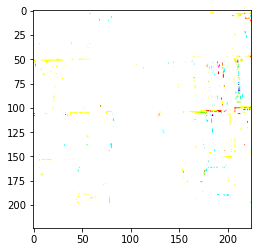

(1, 224, 224, 3) 0.0 255.0
[ 24.681536  50.553875  56.07483   57.200745  60.107708  65.47944
  65.69231   66.75809   68.53114   68.6768    70.330086  71.127975
  71.17358   73.006966  73.070656  74.274895  74.31233   75.2364
  75.41372   75.657036  75.70031   75.87582   76.67071   76.80916
  78.31203   80.42783   80.451805  81.297745  81.873146  81.92504
  81.988884  82.55066   83.266335  84.46199   84.87318   85.0873
  85.18943   85.33963   85.46893   85.610916  85.635506  86.067696
  86.19566   86.29543   86.307976  86.346146  86.72806   86.83717
  86.988754  87.07175   87.426506  87.5003    87.50904   87.9204
  88.16695   88.2389    88.612175  88.79199   89.52388   89.8257
  89.84385   90.40357   90.47284   90.569824  90.61607   90.97057
  91.6425    91.97133   92.413704  92.90025   93.139946  93.27749
  93.68667   94.02896   94.18343   94.303535  94.75533   96.257256
  96.818054  97.042076  97.872025  99.18492   99.62621  100.17757
 100.69862  100.962166 101.461334 101.73061  102.5

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


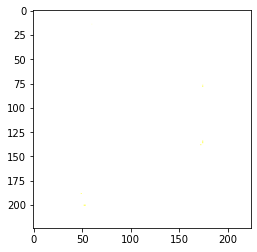

(1, 224, 224, 3) 0.0 255.0
[ 51.154076  51.929592  51.941296  53.348618  53.53568   55.438538
  55.849403  56.60805   56.639694  56.698227  57.005966  57.700443
  58.92433   60.373775  61.540382  61.805218  62.33377   64.04074
  64.669395  65.30934   65.70116   68.24085   73.43834   73.54736
  73.729546  75.24019   75.52965   77.97063   79.47829   79.96411
  81.37002   81.64582   82.456345  84.455635  84.56381   84.70158
  84.84595   84.98849   85.08154   85.24215   85.62987   85.63389
  85.65403   86.11163   86.39981   86.71303   87.01174   87.03482
  87.18001   87.33351   87.37049   87.62776   87.73172   87.83618
  87.92184   88.071495  88.377235  89.07837   89.11595   89.79926
  90.00156   90.17584   90.40204   90.61376   90.78148   90.825096
  91.25248   91.533936  91.7568    92.61631   92.74779   92.974205
  93.879196  93.88331   94.439476  94.74994   95.11432   96.16186
  96.679085  97.392075  97.62465   97.96621   98.397156  98.6122
  98.6892    99.127846 100.33367  100.82243  1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


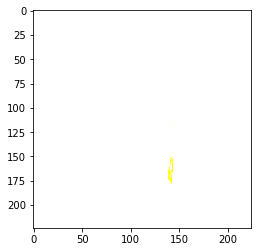

(1, 224, 224, 3) 0.0 255.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[ 41.898476  48.403763  49.745644  53.33076   53.913273  55.368187
  55.46267   55.560513  55.630455  56.63031   57.548244  58.734688
  59.42615   59.985157  60.843468  61.170418  64.084785  65.10627
  65.14277   66.416374  66.51423   67.436165  68.015144  68.86809
  69.39078   69.74277   72.04177   72.55068   78.0592    79.230965
  80.00719   80.35461   80.89133   81.77532   82.24529   82.612274
  82.63963   82.866585  83.16064   83.2095    83.43129   83.5312
  83.89149   84.01344   84.03982   84.111336  84.17284   84.213554
  84.56059   84.62371   85.21466   85.9119    86.19143   86.33711
  86.67963   86.90164   86.943184  86.95655   86.986984  87.26108
  87.516914  87.786995  88.08737   88.08851   88.62451   88.67087
  89.97347   90.36235   91.08058   91.5558    91.83046   92.05964
  92.59837   92.89347   93.31879   94.15929   94.327     94.565926
  95.93352   96.06124   96.81386   97.02639   97.06922   98.51133
  98.64708   99.73151   99.88886   99.94465  100.029816 100.24111
 100.

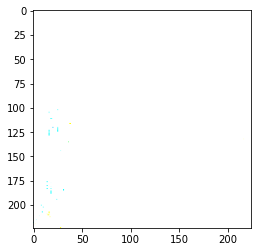

(1, 224, 224, 3) 0.0 255.0
[ 39.338593  44.86659   46.09695   48.45715   49.004757  49.73001
  50.402306  51.41246   52.215767  53.555347  53.700676  54.094776
  55.53751   57.026134  57.716652  58.431026  58.750713  59.12964
  59.550877  59.906815  60.232815  60.725334  65.65114   66.5114
  66.69585   69.74144   70.18191   71.1579    71.24569   71.58818
  73.60617   74.3548    75.001686  75.353615  75.56473   75.80325
  76.002716  76.129845  76.22629   76.24717   76.472206  76.51568
  76.66386   76.95717   77.52141   77.59199   77.89359   78.24158
  78.893906  79.14079   79.272964  79.32161   79.452446  79.810394
  79.815796  80.2125    80.33789   80.63391   80.795876  81.13915
  81.18879   81.27544   81.335014  81.339806  81.726425  81.756645
  82.61194   83.95665   84.73144   84.974014  85.44328   85.67032
  85.82021   85.89545   85.92266   87.79251   88.26373   88.52095
  89.680115  89.98902   90.05917   90.40499   92.60119   92.73203
  92.897835  92.96689   93.00787   93.37715   9

In [185]:
test_features = []
test_labels =[]
data = list(test_ds.as_numpy_iterator())
k = 5
tp = [0, 0, 0, 0]
for i in range(80):
    image = data[i][0]
    label = data[i][1][0]
    plt.imshow(image[0])
    plt.show()
    print(image.shape, np.min(image), np.max(image))
    #preprocessed_input = tf.keras.applications.efficientnet.preprocess_input(image)
    #test_feature = efficientnet_features.predict(preprocessed_input)
    preprocessed_input = tf.keras.applications.vgg16.preprocess_input(image)
    test_feature = vgg16_features.predict(preprocessed_input)
    dist = np.linalg.norm(test_feature - train_dict["features"], axis =1)
    idx = np.argsort(dist)[:k]
    sorted_labels = [train_dict["labels"][i] for i in np.argsort(dist)]
    print(np.sort(dist), sorted_labels)
    top_k = [train_dict["labels"][i] for i in idx]
    print(idx, top_k)
    d = {x:top_k.count(x) for x in top_k}
    d = sorted(d.items(), key=lambda x: x[1])
    pred = d[0][0]
    print(label, pred, pred == label)
    if pred == label:
        tp[label]+=1

print(tp)

In [183]:
tp

[18, 20, 20, 20]

In [115]:
a = [10, 1, 2, 6, 13, 15, 0, 4, 72, 61, 80, 90, 11, 1, 5, 9]
k=5
idx = np.argpartition(a, k)[:k]  # Indices not sorted
print(idx)
idx[np.argsort(dist[idx])]  # Indices sorted by value from smallest to largest
print(idx[np.argsort(dist[idx])])
dist[idx]
res_list = [train_dict["labels"][i] for i in idx] 
print(res_list)

[13  6  1  2  7]
[ 6  1  7 13  2]
[2, 0, 0, 2, 0]


In [85]:
np.array(train_features).shape
np.array(train_labels).shape

(120,)

In [86]:
out = list(train_ds)
np.array(out[0]).shape

(2, 1)

In [87]:
len(data)

120

In [82]:
data[0][0].shape

(32, 224, 224, 3)

In [132]:
tp

10